In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
file_name1 = "Sales_Shipment_Data.csv"
file_name2 = "Inventory_Stock_Data.csv"
file_path = "C://Users//moham//Downloads//case project//Integrated Case Study - Python//"
Sales_Shipment_Data = pd.read_csv(file_path + file_name1)
Inventory_Stock_Data = pd.read_csv(file_path + file_name2)
final_data= pd.merge(right = Sales_Shipment_Data,left = Inventory_Stock_Data,right_on = "Product Id",left_on = "product id",how = "left")

In [4]:
# a. Data Audit: Calculate Below metrics (Weightage - 10%)

In [5]:
# 1. Number of rows & Number of columns

num_rows,num_columns = final_data.shape
print(f"Number of Rows:{num_rows}")
print(f"Number of columns:{num_columns}")

Number of Rows:180519
Number of columns:57


In [6]:
# 2. Number of numerical & categorical columns

numerical_columns = final_data.select_dtypes(include = ["number"]).columns
categorical_columns = final_data.select_dtypes(include = ["object"]).columns
num_numerical_columns = len(numerical_columns)
num_categorical_columns = len(categorical_columns)

print(f"Number of Numerical Columns:{num_numerical_columns}")
print(f"Number of Categorical Columns:{num_categorical_columns}")

Number of Numerical Columns:33
Number of Categorical Columns:24


In [7]:
# 3. Any other observations from the data in terms of cleaning, preparation required?

# Check for missing values
missing_values = final_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Summary statistics for numerical columns
summary_statistics = final_data.describe()
print("Summary Statistics:")
print(summary_statistics)

# Unique values in categorical columns
unique_values_categorical = final_data.select_dtypes(include='object').nunique()
print("Unique Values in Categorical Columns:")
print(unique_values_categorical)


Missing Values:
order-now                        0
product id                       0
product name                     0
avg lead time                    0
avg order qty                    0
current stock                    0
max lead time                    0
max order qty                    0
mod                              0
reorder point                    0
safety stock                     0
Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Orde

In [200]:
# 4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)A

Numeric_Column=final_data.select_dtypes(include=["number"]).columns
Category_Column=final_data.select_dtypes(include=["object"]).columns

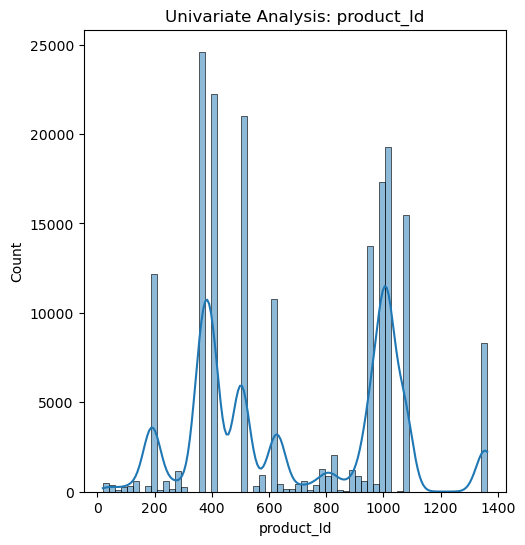

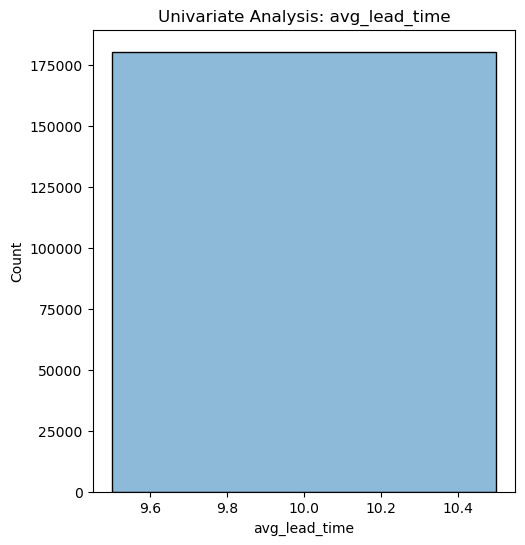

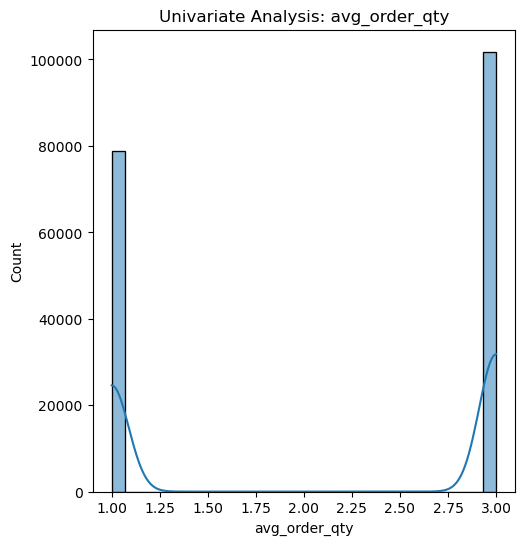

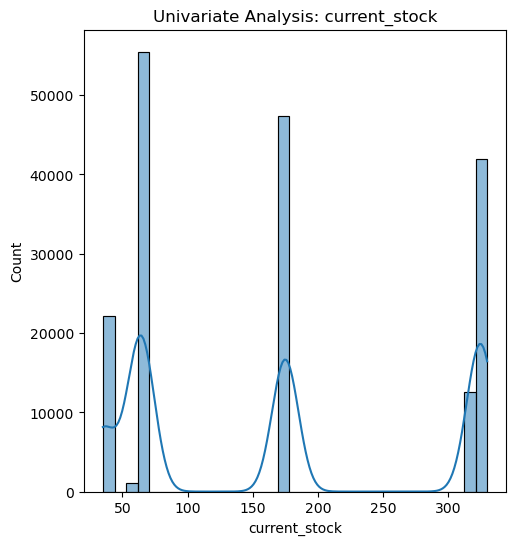

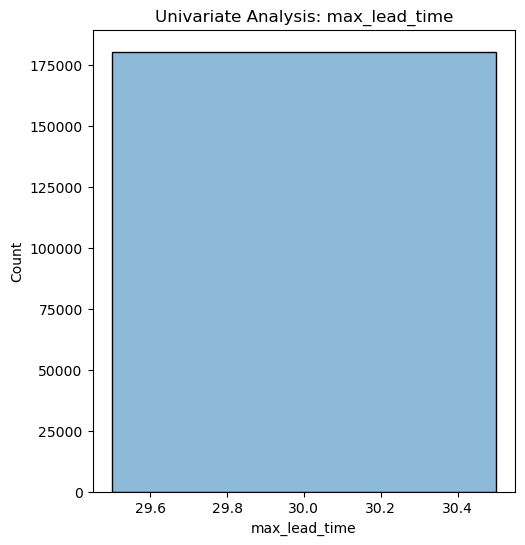

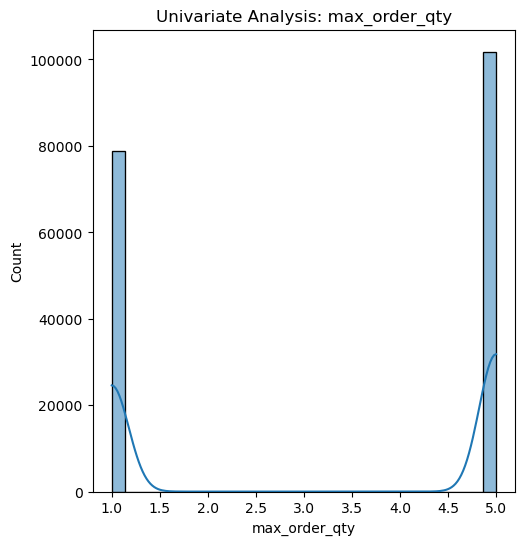

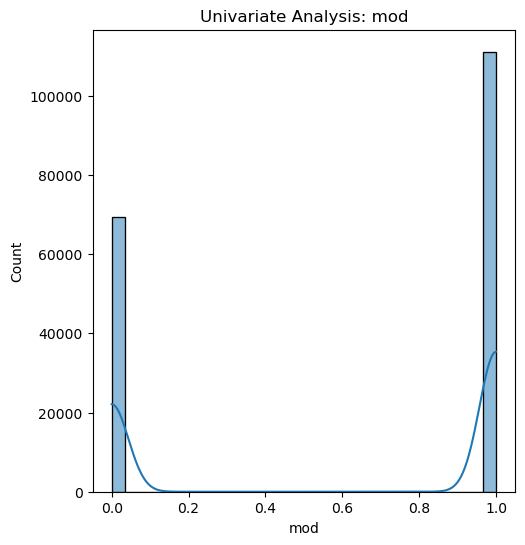

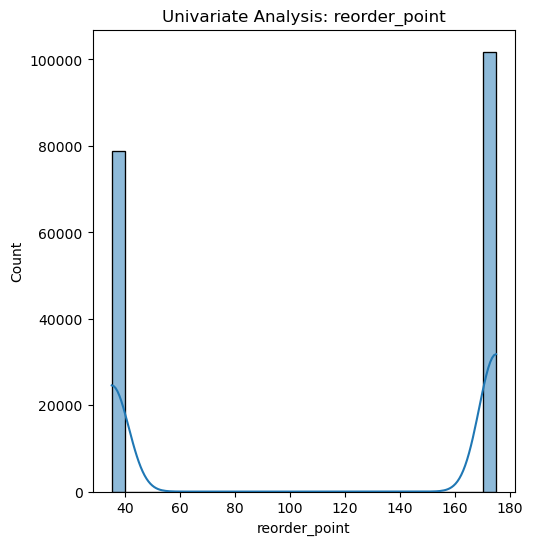

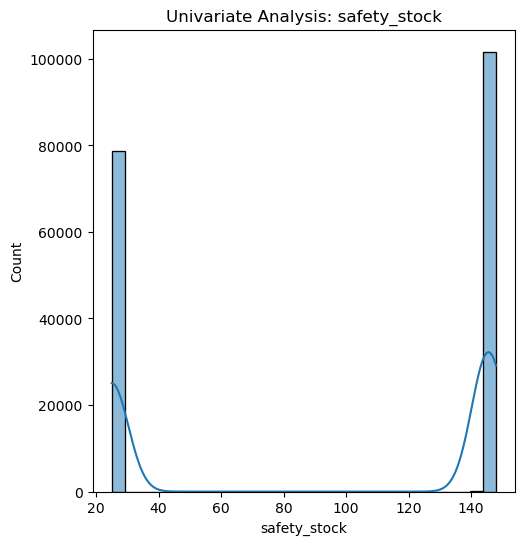

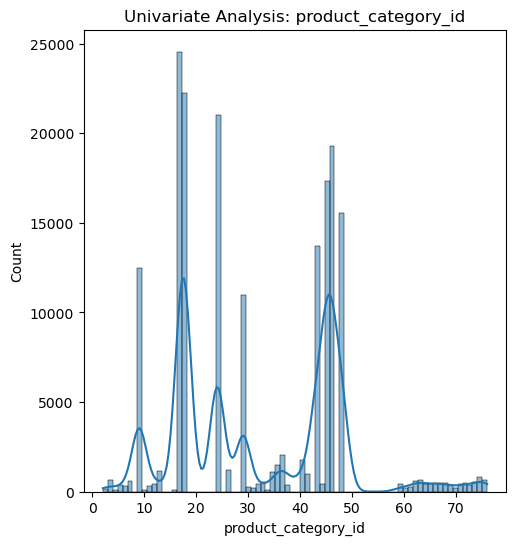

In [201]:
# Histogram for Numeric_Column
selected_numerical_columns = Numeric_Column[:10]

for column in selected_numerical_columns:
    plt.figure(figsize = (12, 6))
    
    # Univariate Analysis - Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(final_data[column], kde = True)
    plt.title(f'Univariate Analysis: {column}')

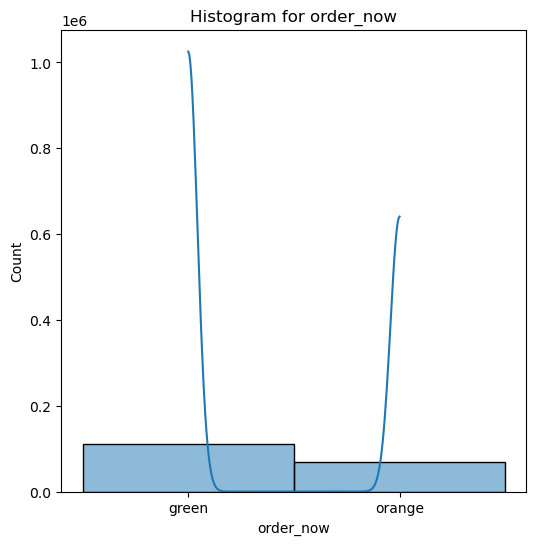

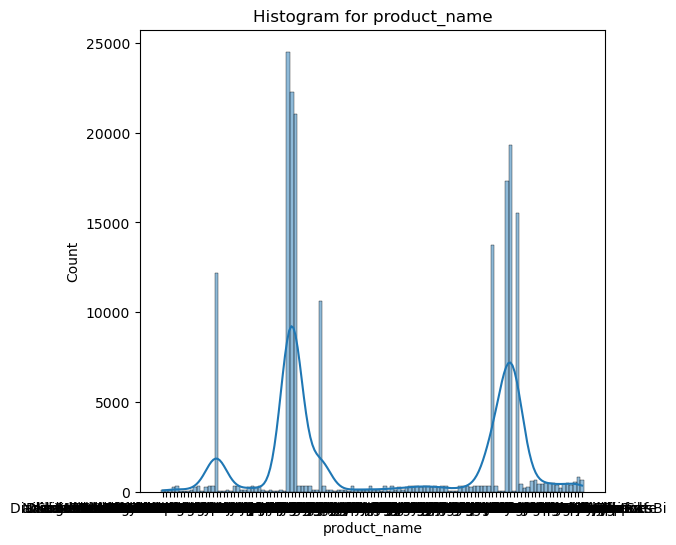

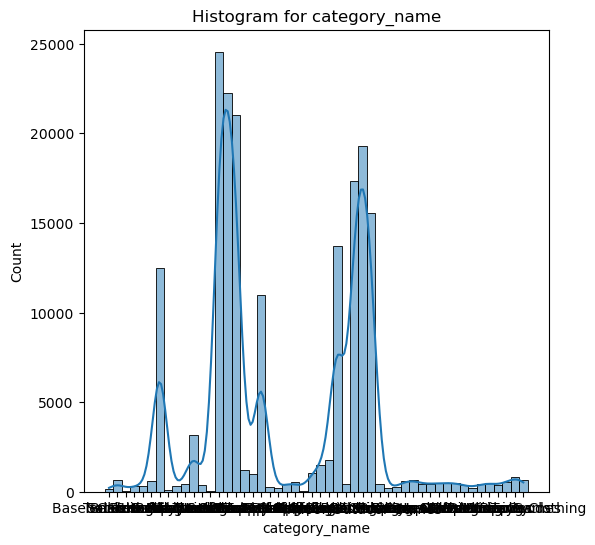

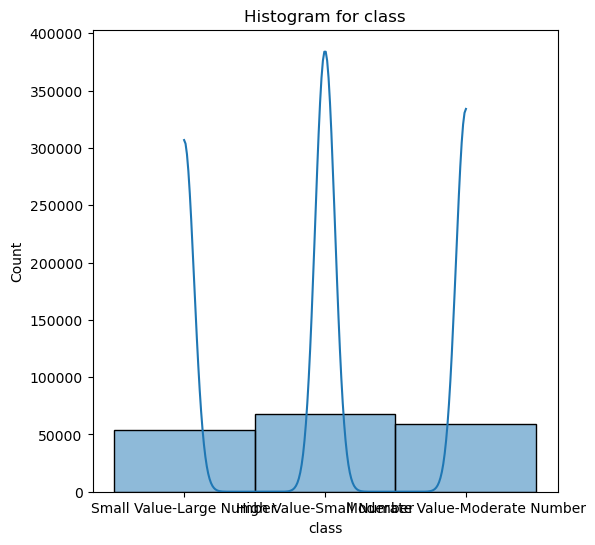

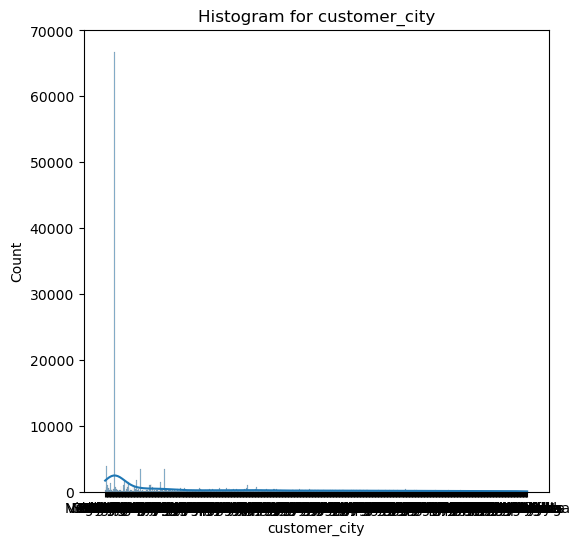

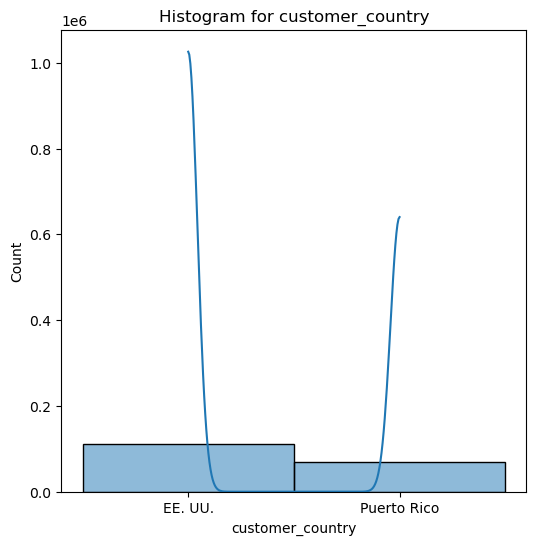

In [203]:
# Histogram for Categorical_Column
selected_categorical_columns = Category_Column[:6]
for column in selected_categorical_columns:
    plt.figure(figsize = (6,6))
    sns.histplot(final_data[column],kde = True)
    plt.title(f'Histogram for {column}')
    plt.show()

In [13]:
# 5. Find out data related issues based on the data Audit

# Check for info data
info_data = final_data.info()
print("Info:")
print(info_data)

# Check for duplicate rows
duplicate_rows = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Summary statistics for numerical columns
summary_statistics = final_data.describe()
print("Summary Statistics:")
print(summary_statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order-now                      180519 non-null  object 
 1   product id                     180519 non-null  int64  
 2   product name                   180519 non-null  object 
 3   avg lead time                  180519 non-null  int64  
 4   avg order qty                  180519 non-null  int64  
 5   current stock                  180519 non-null  int64  
 6   max lead time                  180519 non-null  int64  
 7   max order qty                  180519 non-null  int64  
 8   mod                            180519 non-null  int64  
 9   reorder point                  180519 non-null  int64  
 10  safety stock                   180519 non-null  int64  
 11  Product Category Id            180519 non-null  int64  
 12  Category Name                 

In [10]:
# b. Data Preparation: (Weightage - 15%)

In [11]:
# 1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)

In [14]:
final_data["Delivery_Difference"] = final_data["Days for shipping (real)"] - final_data["Days for shipment (scheduled)"]

In [15]:
final_data['Late_Delivery_Risk'] = final_data['Delivery_Difference'].apply(lambda x: 'Late' if x > 0 else 'Not Late')
final_data = final_data.drop("Delivery_Difference",axis = 1)

In [17]:
# 2. Rename the variables as per python naming convensions

column_name_mapping = {
    'order-now': 'order_now',
    'product id': 'product_Id',
    'product name': 'product_name',
    'avg lead time': 'avg_lead_time',
    'avg order qty': 'avg_order_qty',
    'current stock': 'current_stock',
    'max lead time': 'max_lead_time',
    'max order qty': 'max_order_qty',
    'mod': 'mod',
    'reorder point': 'reorder_point',
    'safety stock': 'safety_stock',
    'Product Category Id': 'product_category_id',
    'Category Name': 'category_name',
    'Class': 'class',
    'Customer City': 'customer_city',
    'Customer Country': 'customer_country',
    'Customer Id': 'customer_id',
    'Customer Segment': 'customer_segment',
    'Customer State': 'customer_state',
    'Customer Street': 'customer_street',
    'Customer Zipcode': 'customer_zipcode',
    'Delivery Status': 'delivery_status',
    'Department Id': 'department_id',
    'Department Name': 'department_name',
    'Market': 'market',
    'Order City': 'order_city',
    'Order Country': 'order_country',
    'order date (DateOrders)': 'order_date',
    'Order Id': 'order_id',
    'Order Region': 'order_region',
    'Order State': 'order_state',
    'Order Status': 'order_status',
    'Product Id': 'product_id',
    'Product Name': 'product_names',
    'shipping date (DateOrders)': 'shipping_date',
    'Shipping Mode': 'shipping_mode',
    'Type': 'type',
    'Benefit per order': 'benefit_per_order',
    'Days for shipment (scheduled)': 'days_for_shipment_scheduled',
    'Days for shipping (real)': 'days_for_shipping_real',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Order Customer Id': 'order_customer_id',
    'Order Item Cardprod Id': 'order_item_cardprod_id',
    'Order Item Discount': 'order_item_discount',
    'Order Item Discount Rate': 'order_item_discount_rate',
    'Order Item Id': 'order_item_id',
    'Order Item Product Price': 'order_item_product_price',
    'Order Item Profit Ratio': 'order_item_profit_ratio',
    'Order Item Quantity': 'order_item_quantity',
    'Order Item Total': 'order_item_total',
    'Order Profit Per Order': 'order_profit_per_order',
    'Product Price': 'product_price',
    'Sales': 'sales',
    'Sales per customer': 'sales_per_customer',
    'Customer Name': 'customer_name',
    'Late_Delivery_Risk': 'late_delivery_risk'
}
final_data = final_data.rename(columns = column_name_mapping)
final_data.head()

,order_now,product_Id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,...,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,order_item_total,order_profit_per_order,product_price,sales,sales_per_customer,late_delivery_risk
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,158963,124.989998,0.30,1,112.489998,33.75,124.989998,124.989998,112.489998,Late
1,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,157083,124.989998,0.14,1,103.739998,14.32,124.989998,124.989998,103.739998,Late
2,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,164781,124.989998,0.05,1,106.239998,5.31,124.989998,124.989998,106.239998,Late
3,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,164778,124.989998,0.25,1,104.989998,26.25,124.989998,124.989998,104.989998,Late
4,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,156149,124.989998,0.49,1,124.989998,61.25,124.989998,124.989998,124.989998,Late


In [18]:
# 3. Convert the variables data types as per the data descriptions

final_data["order_date"]

0          7/17/2017 8:30
1           07/06/17 2:02
2         8/20/2017 11:37
3         8/20/2017 11:37
4         6/30/2017 23:25
               ...       
180514    1/30/2018 20:19
180515     1/30/2018 7:00
180516    1/30/2018 19:16
180517     12/12/17 14:36
180518    1/29/2018 20:29
Name: order_date, Length: 180519, dtype: object

In [20]:
final_data["Order_date"] = pd.to_datetime(final_data["order_date"], errors = 'coerce', format = "%m/%d/%Y %H:%M", infer_datetime_format = True)
final_data["order_Date"] = pd.to_datetime(final_data["order_date"], errors = 'coerce', format = "%m/%d/%y %H:%M", infer_datetime_format = True)
final_data["order_Date"] = final_data["order_Date"].fillna(final_data["Order_date"])

C:\Users\moham\AppData\Local\Temp\ipykernel_1676\3918690791.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  final_data["Order_date"]=pd.to_datetime(final_data["order_date"], errors='coerce', format="%m/%d/%Y %H:%M", infer_datetime_format=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_1676\3918690791.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  final_data["order_Date"]=pd.to_datetime(final_data["order_date"], errors='coerce', format="%m/%d/%y %H:%M", infer_datetime_format=True)


In [21]:
final_data = final_data.drop(["Order_date","order_date"],axis = 1) 

In [23]:
final_data["order_Date"].head()

0   2017-07-17 08:30:00
1   2017-07-06 02:02:00
2   2017-08-20 11:37:00
3   2017-08-20 11:37:00
4   2017-06-30 23:25:00
Name: order_Date, dtype: datetime64[ns]

In [24]:
final_data["Shipping_date"] = pd.to_datetime(final_data["shipping_date"], errors = 'coerce', format = "%m/%d/%Y %H:%M", infer_datetime_format = True)
final_data["shipping_Date"] = pd.to_datetime(final_data["shipping_date"], errors = 'coerce', format = "%m/%d/%y %H:%M", infer_datetime_format = True)
final_data["shipping_Date"] = final_data["shipping_Date"].fillna(final_data["Shipping_date"])

C:\Users\moham\AppData\Local\Temp\ipykernel_1676\3275468770.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  final_data["Shipping_date"]=pd.to_datetime(final_data["shipping_date"], errors='coerce', format="%m/%d/%Y %H:%M", infer_datetime_format=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_1676\3275468770.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  final_data["shipping_Date"]=pd.to_datetime(final_data["shipping_date"], errors='coerce', format="%m/%d/%y %H:%M", infer_datetime_format=True)


In [25]:
final_data = final_data.drop(["shipping_date","Shipping_date"],axis = 1)

In [26]:
final_data["shipping_Date"].head()

0   2017-07-19 08:30:00
1   2017-07-12 02:02:00
2   2017-08-26 11:37:00
3   2017-08-26 11:37:00
4   2017-07-06 23:25:00
Name: shipping_Date, dtype: datetime64[ns]

In [ ]:
# 4. Impute missing values with mean for numerical variables, mode for categorical variables

#Numerical Variables
mean = final_data["customer_zipcode"].mean()
mean = round(mean)
final_data["customer_zipcode"] = final_data["customer_zipcode"].fillna(mean)
final_data.isna().sum()

final_data["Customer Lname"] = final_data["Customer Lname"].fillna(final_data["Customer Lname"].mode().iloc[0])
final_data["Customer Name"] = final_data["Customer Fname"] + " " + final_data["Customer Lname"]
final_data = final_data.drop(["Customer Fname","Customer Lname"],axis = 1)

In [34]:
# 5. Perform any other data preparation steps as required?

final_data["order_year"] = final_data["order_Date"].dt.isocalendar().year
final_data["order_week"] = final_data["order_Date"].dt.isocalendar().week
final_data["order_month"] = final_data["order_Date"].dt.month
final_data["order_quarter"] = final_data["order_Date"].dt.quarter
final_data["order_hour"] = final_data["order_Date"].dt.hour
final_data.head()

,order_now,product_Id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,...,sales_per_customer,late_delivery_risk,order_Date,shipping_Date,Customer Name,order_year,order_week,order_month,order_quarter,order_hour
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,112.489998,Late,2017-07-17 08:30:00,2017-07-19 08:30:00,Sara Smith,2017,29,7,3,8
1,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,103.739998,Late,2017-07-06 02:02:00,2017-07-12 02:02:00,Roger Smith,2017,27,7,3,2
2,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,106.239998,Late,2017-08-20 11:37:00,2017-08-26 11:37:00,Deborah Smith,2017,33,8,3,11
3,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,104.989998,Late,2017-08-20 11:37:00,2017-08-26 11:37:00,Deborah Smith,2017,33,8,3,11
4,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,124.989998,Late,2017-06-30 23:25:00,2017-07-06 23:25:00,Robert Smith,2017,26,6,2,23


In [35]:
final_data["shipping_year"] = final_data["shipping_Date"].dt.isocalendar().year
final_data["shipping_week"] = final_data["shipping_Date"].dt.isocalendar().week
final_data["shipping_month"] = final_data["shipping_Date"].dt.month
final_data["shipping_quarter"] = final_data["shipping_Date"].dt.quarter
final_data["shipping_hour"] = final_data["shipping_Date"].dt.hour
final_data.head()

,order_now,product_Id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,...,order_year,order_week,order_month,order_quarter,order_hour,shipping_year,shipping_week,shipping_month,shipping_quarter,shipping_hour
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,2017,29,7,3,8,2017,29,7,3,8
1,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,2017,27,7,3,2,2017,28,7,3,2
2,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,2017,33,8,3,11,2017,34,8,3,11
3,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,2017,33,8,3,11,2017,34,8,3,11
4,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,...,2017,26,6,2,23,2017,27,7,3,23


In [36]:
# c. List of Analysis: (weightage - 40%)

In [108]:
# 1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc

#total sale value
tsv = final_data["sales_per_customer"].sum()
print(f"Total Sale Value: {tsv}")

#total sale units
tsu = final_data["order_item_quantity"].sum()
print(f"Total Sale Units: {tsu}")

#inventory value
final_data["inventory_value"] = final_data["current_stock"] * final_data["product_price"].round(2)
tiv = final_data["inventory_value"].sum().round(2)
print(f"Total Inventory Value: {tiv}")

#inventory quantity
tiq = final_data["current_stock"].sum()
print(f"Total Inventory Quantity: {tiq}")

#profit value
tpv = final_data["order_profit_per_order"].sum()
print(f"Total Profit Value: {tpv}")

#number of distinct products
ndp = final_data["product_name"].nunique()
print(f"Number of Distinct Products: {ndp}")

#number of distinct categories
ndc = final_data["category_name"].nunique()
print(f"Number of Distinct Categories: {ndc}")

Total Sale Value: 33054402.380216613
Total Sale Units: 384079
Total Inventory Value: 2536160955.67
Total Inventory Quantity: 30378127
Total Profit Value: 3966902.974050357
Number of Distinct Products: 118
Number of Distinct Categories: 50


In [109]:
# 2. Status of orders (number of orders by current status)

order_status_cnt = final_data["order_status"].value_counts()
print("Status of Orders (Number of Orders by Current Status):")
print(order_status_cnt)

Status of Orders (Number of Orders by Current Status):
order_status
Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: count, dtype: int64


In [112]:
# 3. Status of Delivery of orders (number of orders by each type of delivery status)

d_cnt = final_data["delivery_status"].value_counts()
print("Status of Delivery of orders (number of orders by each type of delivery status)")
print(d_cnt)

Status of Delivery of orders (number of orders by each type of delivery status)
delivery_status
Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: count, dtype: int64


In [111]:
# 4. Late Delivery Risk by time (by each week, month, year, quarter)

#Group by shipping time and late delivery risk

gpd_tm = final_data.groupby("shipping_hour")["late_delivery_risk"].value_counts().unstack()
gpd_tm

late_delivery_risk,Late,Not Late
shipping_hour,,
0,4524,3040
1,4552,2930
2,4562,3032
3,4403,2923
4,4527,3092
5,4620,3053
6,4131,3019
7,4589,2958
8,4278,3090


In [113]:
#Group by shipping week and late delivery risk

gpd_wk = final_data.groupby("shipping_week")["late_delivery_risk"].value_counts().unstack()
gpd_wk

late_delivery_risk,Late,Not Late
shipping_week,,
1,1725,1287
2,2153,1803
3,2370,1736
4,2266,1796
5,2354,1635
6,2061,1538
7,2144,1502
8,2021,1560
9,1985,1650


In [114]:
#Group by shipping month and late delivery risk

gpd_mth = final_data.groupby("shipping_month")["late_delivery_risk"].value_counts().unstack()
gpd_mth

late_delivery_risk,Late,Not Late
shipping_month,,
1,9807,7597
2,8513,6318
3,9205,6681
4,8716,6735
5,9140,6703
6,8753,6529
7,9101,6853
8,9083,6706
9,9005,6534


In [115]:
#Group by shipping year and late delivery risk

gpd_yr = final_data.groupby("shipping_year")["late_delivery_risk"].value_counts().unstack()
gpd_yr

late_delivery_risk,Late,Not Late
shipping_year,,
2015,35749,26800
2016,35673,26530
2017,30575,22823
2018,1403,966


In [116]:
#Group by shipping quarter and late delivery risk

gpd_qtr = final_data.groupby("shipping_quarter")["late_delivery_risk"].value_counts().unstack()
gpd_qtr

late_delivery_risk,Late,Not Late
shipping_quarter,,
1,27525,20596
2,26609,19967
3,27189,20093
4,22077,16463


In [117]:
# 5. Order Item qty by time (by each week, month, year, quarter)

#Order Item qty by time 

grp_time = final_data.groupby("order_hour")["order_item_quantity"].sum().reset_index()
grp_time

,order_hour,order_item_quantity
0,0,16156
1,1,16147
2,2,16245
3,3,16046
4,4,16172
5,5,16158
6,6,15587
7,7,15903
8,8,15895
9,9,16056


In [118]:
#Order Item qty by week 

grp_week = final_data.groupby("order_week")["order_item_quantity"].sum().reset_index()
grp_week

,order_week,order_item_quantity
0,1,7064
1,2,8200
2,3,8672
3,4,8540
4,5,8186
5,6,7812
6,7,7878
7,8,8163
8,9,8089
9,10,7951


In [119]:
#Order Item qty by month 

grp_month = final_data.groupby("order_month")["order_item_quantity"].sum().reset_index()
grp_month

,order_month,order_item_quantity
0,1,37179
1,2,32273
2,3,35087
3,4,33684
4,5,34538
5,6,32405
6,7,34543
7,8,34390
8,9,33152
9,10,26129


In [120]:
#Order Item qty by year 

grp_year = final_data.groupby("order_year")["order_item_quantity"].sum().reset_index()
grp_year

,order_year,order_item_quantity
0,2015,139615
1,2016,136548
2,2017,105793
3,2018,2123


In [122]:
#Order Item qty by quarter 

grp_quarter = final_data.groupby("order_quarter")["order_item_quantity"].sum().reset_index()
grp_quarter

,order_quarter,order_item_quantity
0,1,104539
1,2,100627
2,3,102085
3,4,76828


In [123]:
# 6. Sales units/value  by time (by each week, month, year, quarter)

#Sales value/units  by time

grd_time = final_data.groupby("order_hour").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
grd_time

,order_hour,sales_value,sales_units
0,0,1387830.34,7590
1,1,1384831.00,7559
2,2,1383179.40,7574
3,3,1365445.27,7440
4,4,1408558.50,7719
5,5,1395058.17,7591
6,6,1336077.68,7270
7,7,1369548.83,7518
8,8,1373562.32,7435
9,9,1379395.84,7505


In [124]:
#Sales value/units  by week

grd_wk = final_data.groupby("order_week").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
grd_wk

,order_week,sales_value,sales_units
0,1,655859.97,3496
1,2,710854.23,4013
2,3,656670.80,4110
3,4,684038.98,4091
4,5,691914.07,3846
5,6,620778.55,3524
6,7,641404.05,3557
7,8,648790.31,3647
8,9,641717.82,3645
9,10,632403.96,3612


In [125]:
#Sales value/units  by month

grd_month = final_data.groupby("order_month").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
grd_month

,order_month,sales_value,sales_units
0,1,3109090.46,17979
1,2,2595053.47,14529
2,3,2807828.27,15919
3,4,2744815.52,15435
4,5,2862117.04,15976
5,6,2749136.04,15139
6,7,2864576.62,15922
7,8,2864109.69,15912
8,9,2842005.73,15489
9,10,2851094.79,12955


In [126]:
#Sales value/units  by year

gr_yr = final_data.groupby("order_year").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
gr_yr

,order_year,sales_value,sales_units
0,2015,11182390.18,63183
1,2016,10989577.73,62158
2,2017,10584482.41,53055
3,2018,297952.05,2123


In [127]:
#Sales value/units  by quarter

gr_quarter = final_data.groupby("order_quarter").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
gr_quarter

,order_quarter,sales_value,sales_units
0,1,8511972.20,48427
1,2,8356068.60,46550
2,3,8570692.04,47323
3,4,7615669.53,38219


In [58]:
# 7. Profit orders/value  by time (by each week, month, year, quarter)

profit_value = final_data[final_data["order_profit_per_order"] > 0]

In [128]:
# Profit orders/value  by time

gd_time = profit_value.groupby("order_hour").agg(profit_value = ("order_profit_per_order","sum"),profit_order = ("order_profit_per_order","count")).round(2).reset_index()
gd_time

,order_hour,profit_value,profit_order
0,0,330593.75,6138
1,1,321644.29,6055
2,2,331340.25,6115
3,3,324428.13,6016
4,4,333530.81,6195
5,5,329009.60,6128
6,6,312017.00,5846
7,7,316319.09,5985
8,8,326814.50,5985
9,9,330794.73,6076


In [129]:
# Profit orders/value  by week

gr_wk = profit_value.groupby("order_week").agg(profit_value = ("order_profit_per_order","sum"),profit_order = ("order_profit_per_order","count")).round(2).reset_index()
gr_wk

,order_week,profit_value,profit_order
0,1,158400.80,2866
1,2,163125.11,3191
2,3,154267.91,3313
3,4,157614.23,3238
4,5,165525.83,3142
5,6,149270.63,2884
6,7,150721.43,2820
7,8,155596.90,2972
8,9,153210.48,2956
9,10,146098.41,2890


In [130]:
# Profit orders/value  by month

gr_mth = profit_value.groupby("order_month").agg(profit_value = ("order_profit_per_order","sum"),profit_order = ("order_profit_per_order","count")).round(2).reset_index()
gr_mth

,order_month,profit_value,profit_order
0,1,730886.02,14460
1,2,616900.18,11748
2,3,664400.31,12847
3,4,656347.32,12430
4,5,678696.41,12852
5,6,651543.01,12189
6,7,683976.14,12791
7,8,682843.42,12860
8,9,677439.87,12583
9,10,679589.37,10521


In [131]:
# Profit orders/value  by year

gr_year = profit_value.groupby("order_year").agg(profit_value = ("order_profit_per_order","sum"),profit_order = ("order_profit_per_order","count")).round(2).reset_index()
gr_year

,order_year,profit_value,profit_order
0,2015,2655134.78,50950
1,2016,2604658.58,50027
2,2017,2520892.50,42883
3,2018,69764.46,1698


In [132]:
# Profit orders/value  by quarter

gr_quarter = profit_value.groupby("order_quarter").agg(profit_value = ("order_profit_per_order","sum"),profit_order = ("order_profit_per_order","count")).round(2).reset_index()
gr_quarter

,order_quarter,profit_value,profit_order
0,1,2012186.51,39055
1,2,1986586.74,37471
2,3,2044259.43,38234
3,4,1807417.64,30798


In [133]:
# 8. Order profit per order  by time (by each week, month, year, quarter)

#Order profit per order  by time

gud_time = final_data.groupby("order_hour")["order_profit_per_order"].sum().round(2).reset_index()
gud_time

,order_hour,order_profit_per_order
0,0,175227.82
1,1,146132.81
2,2,175217.49
3,3,167813.68
4,4,171185.37
5,5,183514.42
6,6,150468.40
7,7,148427.10
8,8,163740.17
9,9,171069.17


In [134]:
#Order profit per order  by week

gud_week = final_data.groupby("order_week")["order_profit_per_order"].sum().round(2).reset_index()
gud_week

,order_week,order_profit_per_order
0,1,92037.64
1,2,75680.46
2,3,74293.70
3,4,72440.37
4,5,84926.32
5,6,83214.70
6,7,61892.83
7,8,76089.98
8,9,82736.90
9,10,62933.53


In [135]:
#Order profit per order  by month

gud_month = final_data.groupby("order_month")["order_profit_per_order"].sum().round(2).reset_index()
gud_month

,order_month,order_profit_per_order
0,1,367127.43
1,2,301061.22
2,3,333727.10
3,4,339021.36
4,5,337878.66
5,6,324742.52
6,7,348592.48
7,8,360210.47
8,9,359315.04
9,10,331987.01


In [136]:
#Order profit per order  by year

gud_year = final_data.groupby("order_year")["order_profit_per_order"].sum().round(2).reset_index()
gud_year

,order_year,order_profit_per_order
0,2015,1330701.48
1,2016,1300850.71
2,2017,1301508.89
3,2018,33841.89


In [137]:
#Order profit per order  by quarter

gud_quarter = final_data.groupby("order_quarter")["order_profit_per_order"].sum().round(2).reset_index()
gud_quarter

,order_quarter,order_profit_per_order
0,1,1001915.75
1,2,1001642.54
2,3,1068117.99
3,4,895226.69


In [138]:
# 9. Order count by country/state/  by time (by each week, month, year, quarter)

#Order count by country/state/  by time

gud_time = final_data.groupby(["order_state","order_country","order_hour"]).agg(order_count = ("order_id","count")).reset_index()
gud_time

,order_state,order_country,order_hour,order_count
0,Abia,Nigeria,1,5
1,Abia,Nigeria,12,1
2,Abia,Nigeria,14,7
3,Abia,Nigeria,16,7
4,Abia,Nigeria,17,2
...,...,...,...,...
12102,Équateur,República Democrática del Congo,14,3
12103,Équateur,República Democrática del Congo,18,3
12104,Ústí nad Labem,República Checa,1,4
12105,Ústí nad Labem,República Checa,2,6


In [139]:
#Order count by country/state/  by week

gud_week = final_data.groupby(["order_state","order_country","order_week"]).agg(order_count = ("order_id","count")).reset_index()
gud_week

,order_state,order_country,order_week,order_count
0,Abia,Nigeria,34,1
1,Abia,Nigeria,35,8
2,Abia,Nigeria,38,1
3,Abia,Nigeria,40,11
4,Abia,Nigeria,42,4
...,...,...,...,...
10184,Équateur,República Democrática del Congo,41,3
10185,Équateur,República Democrática del Congo,42,4
10186,Équateur,República Democrática del Congo,45,36
10187,Ústí nad Labem,República Checa,2,10


In [140]:
#Order count by country/state/  by month

gud_month = final_data.groupby(["order_state","order_country","order_month"]).agg(order_count = ("order_id","count")).reset_index()
gud_month

,order_state,order_country,order_month,order_count
0,Abia,Nigeria,8,9
1,Abia,Nigeria,9,1
2,Abia,Nigeria,10,15
3,Abia,Nigeria,12,11
4,Abruzos,Italia,6,9
...,...,...,...,...
4274,Équateur,República Democrática del Congo,9,4
4275,Équateur,República Democrática del Congo,10,7
4276,Équateur,República Democrática del Congo,11,36
4277,Ústí nad Labem,República Checa,1,10


In [141]:
#Order count by country/state/  by year

gud_year = final_data.groupby(["order_state","order_country","order_year"]).agg(order_count = ("order_id","count")).reset_index()
gud_year

,order_state,order_country,order_year,order_count
0,Abia,Nigeria,2016,36
1,Abruzos,Italia,2015,34
2,Abruzos,Italia,2017,27
3,Aceh,Indonesia,2015,3
4,Aceh,Indonesia,2016,13
...,...,...,...,...
2100,ilina,Eslovaquia,2016,5
2101,Çanakkale,Turquía,2016,6
2102,Équateur,República Democrática del Congo,2016,47
2103,Ústí nad Labem,República Checa,2016,4


In [142]:
#Order count by country/state/  by quarter

gud_quarter = final_data.groupby(["order_state","order_country","order_quarter"]).agg(order_count = ("order_id","count")).reset_index()
gud_quarter

,order_state,order_country,order_quarter,order_count
0,Abia,Nigeria,3,10
1,Abia,Nigeria,4,26
2,Abruzos,Italia,2,9
3,Abruzos,Italia,3,46
4,Abruzos,Italia,4,6
...,...,...,...,...
2227,Çanakkale,Turquía,3,6
2228,Équateur,República Democrática del Congo,3,4
2229,Équateur,República Democrática del Congo,4,43
2230,Ústí nad Labem,República Checa,1,10


In [143]:
# 10. Inventory Units by each class or cluster

ity_units = final_data.groupby("class").agg(inventory_units=("current_stock","sum")).reset_index()
ity_units

,class,inventory_units
0,High Value-Small Number,13399842
1,Moderate Value-Moderate Number,6059123
2,Small Value-Large Number,10919162


In [144]:
# 11. Inventory Value by each class or cluster

ity_values = final_data.groupby("class").agg(inventory_values = ("inventory_value","sum")).reset_index()
ity_values

,class,inventory_values
0,High Value-Small Number,1.387021e+09
1,Moderate Value-Moderate Number,5.615272e+08
2,Small Value-Large Number,5.876127e+08


In [83]:
# 12. inventory by class

inventory = final_data.groupby("class").agg(inventory = ("current_stock","sum")).reset_index()
inventory

,class,inventory
0,High Value-Small Number,13399842
1,Moderate Value-Moderate Number,6059123
2,Small Value-Large Number,10919162


In [84]:
# 13. Detail Stock Action (products to be ordered, not required to ordered)

final_data["stock_action"] = "Not Required"
final_data.loc[final_data["current_stock"] <= final_data["reorder_point"],"stock_action"] = "To Be Ordered"
stock_action = final_data.groupby(["product_Id","current_stock"])["stock_action"].value_counts().unstack()
stock_action = stock_action.fillna(0)
stock_action

,stock_action,Not Required,To Be Ordered
product_Id,current_stock,,
19,69,64.0,0.0
24,175,0.0,74.0
35,65,65.0,0.0
37,328,262.0,0.0
44,175,0.0,305.0
...,...,...,...
1359,69,492.0,0.0
1360,35,0.0,357.0
1361,61,529.0,0.0


In [145]:
# 14. Product Order qty trend  (by time (by each week, month, year, quarter))

#Product Order qty trend by time
g_time = final_data.groupby(["order_hour","product_Id"]).agg(order_qty = ("order_item_quantity","sum")).reset_index()
g_time

,order_hour,product_Id,order_qty
0,0,19,4
1,0,24,9
2,0,35,3
3,0,37,16
4,0,44,35
...,...,...,...
2666,23,1359,19
2667,23,1360,14
2668,23,1361,23
2669,23,1362,32


In [146]:
#Product Order qty trend by week
g_week = final_data.groupby(["order_week","product_Id"]).agg(order_qty = ("order_item_quantity","sum")).reset_index()
g_week

,order_week,product_Id,order_qty
0,1,37,14
1,1,44,11
2,1,93,15
3,1,116,22
4,1,134,27
...,...,...,...
3594,53,957,108
3595,53,977,9
3596,53,1004,110
3597,53,1014,426


In [149]:
#Product Order qty trend by month
g_month = final_data.groupby(["order_month","product_Id"]).agg(order_qty = ("order_item_quantity","sum")).reset_index()
g_month

,order_month,product_Id,order_qty
0,1,37,77
1,1,44,101
2,1,93,93
3,1,116,120
4,1,134,91
...,...,...,...
895,12,1359,119
896,12,1360,145
897,12,1361,253
898,12,1362,228


In [150]:
#Product Order qty trend by year
g_year = final_data.groupby(["order_year","product_Id"]).agg(order_qty = ("order_item_quantity","sum")).reset_index()
g_year

,order_year,product_Id,order_qty
0,2015,37,305
1,2015,44,406
2,2015,93,348
3,2015,116,422
4,2015,134,384
...,...,...,...
231,2018,1359,246
232,2018,1360,212
233,2018,1361,276
234,2018,1362,610


In [151]:
#Product Order qty trend by quarter
g_quarter = final_data.groupby(["order_quarter","product_Id"]).agg(order_qty = ("order_item_quantity","sum")).reset_index()
g_quarter

,order_quarter,product_Id,order_qty
0,1,37,242
1,1,44,310
2,1,93,284
3,1,116,332
4,1,134,218
...,...,...,...
322,4,1359,246
323,4,1360,145
324,4,1361,253
325,4,1362,228


In [169]:
# 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

#Top 10 Most ordered products

top10_ordered_product = final_data.groupby(["product_Id","product_name"]).agg(total_sales = ("sales_per_customer","sum")).round(2).reset_index()
top10_ordered_product = top10_ordered_product.sort_values(by = "total_sales",ascending = False).head(10)
top10_ordered_product

,product_Id,product_name,total_sales
96,1004,Field & Stream Sportsman 16 Gun Fire Safe,6226935.29
35,365,Perfect Fitness Perfect Rip Deck,3973180.36
92,957,Diamondback Women's Serene Classic Comfort Bi,3700783.63
15,191,Nike Men's Free 5.0+ Running Shoe,3295693.30
37,502,Nike Men's Dri-FIT Victory Golf Polo,2828708.50
99,1073,Pelican Sunstream 100 Kayak,2785518.09
36,403,Nike Men's CJ Elite 2 TD Football Cleat,2598494.42
97,1014,O'Brien Men's Neoprene Life Vest,2596454.02
44,627,Under Armour Girls' Toddler Spine Surge Runni,1140770.96
105,1351,Dell Laptop,595395.00


In [91]:
#Top 10 Most Categories
top10_ordered_Categories = final_data.groupby(["product_category_id","category_name"]).agg(total_sales = ("sales_per_customer","sum")).round(2).reset_index()
top10_ordered_Categories = top10_ordered_Categories.sort_values(by = "total_sales",ascending = False).head(10)
top10_ordered_Categories

,product_category_id,category_name,total_sales
30,45,Fishing,6226935.29
12,17,Cleats,3982856.50
28,43,Camping & Hiking,3700783.63
6,9,Cardio Equipment,3320250.70
14,24,Women's Apparel,2828708.50
32,48,Water Sports,2798044.18
13,18,Men's Footwear,2598494.42
31,46,Indoor/Outdoor Games,2596454.02
16,29,Shop By Sport,1177185.63
38,64,Computers,595395.00


In [92]:
#Top 10 cities interms of revenue and sale units (quantity)

#Top 10 cities interms of revenue

top10_ordered_cities = final_data.groupby(["order_city"]).agg(total_sales = ("sales_per_customer","sum")).round(2).reset_index()
top10_ordered_cities = top10_ordered_cities.sort_values(by = "total_sales",ascending = False).head(10)
top10_ordered_cities

,order_city,total_sales
2256,New York City,392595.13
2872,Santo Domingo,388453.54
1876,Los Angeles,332631.26
3139,Tegucigalpa,328049.03
1958,Managua,301402.34
2075,Mexico City,267269.47
1964,Manila,245027.59
2806,San Francisco,229830.57
1861,London,229786.68
2469,Philadelphia,229544.08


In [93]:
#Top 10 cities interms of sale units (quantity)

top10_ordered_cities_qty = final_data.groupby(["order_city"])["order_item_quantity"].sum().round(2).reset_index()
top10_ordered_cities_qty = top10_ordered_cities_qty.sort_values(by = "order_item_quantity",ascending = False).head(10)
top10_ordered_cities_qty

,order_city,order_item_quantity
2872,Santo Domingo,4899
2256,New York City,4877
1876,Los Angeles,4068
3139,Tegucigalpa,3913
1958,Managua,3809
2075,Mexico City,3258
2469,Philadelphia,2880
1964,Manila,2767
2806,San Francisco,2753
2835,San Salvador,2510


In [94]:
# 16. Top payment methods by each product category.

payment_method = final_data.groupby("category_name")["type"].value_counts().reset_index()
top_payment_method = payment_method.groupby('category_name').apply(lambda x: x.loc[x['count'].idxmax()])
top_payment_method.reset_index(drop = True)


,category_name,type,count
0,Accessories,DEBIT,692
1,As Seen on TV!,DEBIT,24
2,Baby,DEBIT,81
3,Baseball & Softball,DEBIT,235
4,Basketball,TRANSFER,25
5,Books,DEBIT,142
6,Boxing & MMA,DEBIT,154
7,CDs,DEBIT,112
8,Cameras,DEBIT,224
9,Camping & Hiking,DEBIT,5255


In [96]:
# 17. Which shipping mode is more efficient interms of not delaying?

on_time = final_data[final_data["late_delivery_risk"] == "Not Late"]
on_time_counts = on_time.groupby("shipping_mode").size()
on_time_count = on_time_counts.idxmax()
print(f"The Most Efficient Shipping Mode is '{on_time_count}' with {on_time_counts.max()} On-Time Deliveries.")

The Most Efficient Shipping Mode is 'Standard Class' with 64901 On-Time Deliveries.


In [152]:
# 18. Number of orders, sales, qty  by order status

odr_status = final_data.groupby("order_status").agg(total_orders = ("order_id","count"),total_sales = ("sales_per_customer","sum"),total_qty = ("order_item_quantity","sum")).round(2).reset_index()
odr_status

,order_status,total_orders,total_sales,total_qty
0,Canceled,3692,668244.99,7875
1,Closed,19616,3617466.85,41458
2,Complete,59491,10859271.73,126624
3,On Hold,9804,1780237.70,20845
4,Payment Review,1893,345576.16,4109
5,Pending,20227,3704456.23,43196
6,Pending Payment,39832,7286275.64,84736
7,Processing,21902,4051380.77,46623
8,Suspected Fraud,4062,741492.32,8613


In [100]:
# 19. Which categories are most profitable categories (top5)?

top5_profit_cat = final_data.groupby("category_name")["order_profit_per_order"].sum().round(2).reset_index(name = "total_profit")
top5_profit_cat = top5_profit_cat.sort_values(by = "total_profit",ascending = False).head(5)
top5_profit_cat

,category_name,total_profit
18,Fishing,756220.77
12,Cleats,494636.92
9,Camping & Hiking,427455.57
10,Cardio Equipment,383011.10
47,Women's Apparel,350421.03


In [102]:
# 20. Which categoires have been given highest average discount (top5)?

top5_avg_disc_cat = final_data.groupby("category_name")["order_item_discount"].mean().round(2).reset_index(name = "avg_discount")
top5_avg_disc_cat = top5_avg_disc_cat.sort_values(by = "avg_discount",ascending = False).head(5)
top5_avg_disc_cat

,category_name,avg_discount
13,Computers,152.95
41,Strength Training,54.79
20,Garden,53.73
15,Crafts,46.80
8,Cameras,45.80


In [103]:
# 21. Any other analysis you can perform?(At least 5 additional analysis you required to work on beyond the supported questions)

#i) Department-wise Sales and Profitability Analysis:

department_wise = final_data.groupby("department_name").agg(tot_sales = ("sales_per_customer","sum"),
tot_profit = ("order_profit_per_order","sum"),avg_sales = ("sales_per_customer","mean"),
avg_profit = ("order_profit_per_order","mean")).round(2).reset_index()
department_wise

,department_name,tot_sales,tot_profit,avg_sales,avg_profit
0,Apparel,7167654.21,881882.93,146.28,18.00
1,Book Shop,11303.42,883.01,27.91,2.18
2,Discs Shop,205675.90,24193.12,101.52,11.94
3,Fan Shop,15378581.71,1834155.44,230.01,27.43
4,Fitness,357158.26,46538.06,144.07,18.77
5,Footwear,3599468.83,410222.50,247.81,28.24
6,Golf,4142100.96,497523.56,124.69,14.98
7,Health and Beauty,95358.11,9493.63,263.42,26.23
8,Outdoors,1125953.44,145251.46,116.25,15.00
9,Pet Shop,37318.30,3589.26,75.85,7.30


In [153]:
#ii) Customer Segmentation by Geography:

cust_rgn = final_data.groupby(["order_region","customer_segment"])["sales_per_customer"].mean().round(2).unstack()
cust_rgn

customer_segment,Consumer,Corporate,Home Office
order_region,,,
Canada,179.51,164.70,181.52
Caribbean,176.02,180.15,180.40
Central Africa,175.21,174.76,173.00
Central America,179.29,180.18,180.30
Central Asia,178.50,178.16,166.68
East Africa,182.85,182.33,181.97
East of USA,178.31,177.51,178.80
Eastern Asia,184.04,183.13,181.18
Eastern Europe,178.80,177.75,173.83


In [154]:
#iii) Market-wise Analysis:

mkt_wise = final_data.groupby("market").agg(total_sales = ("sales_per_customer","sum"),avg_sales = ("sales_per_customer","mean")).round(2).reset_index()
mkt_wise

,market,total_sales,avg_sales
0,Africa,2061679.39,177.52
1,Europe,9769198.32,194.40
2,LATAM,9235762.09,179.01
3,Pacific Asia,7434262.65,180.18
4,USCA,4553499.92,176.50


In [106]:
#iv) Safety Stock Level Analysis:

safety_stock = final_data.groupby("category_name").agg(total_safety_stock = ("safety_stock","sum"),
avg_safety_stock = ("safety_stock","mean")).round(2).reset_index()
safety_stock

,category_name,total_safety_stock,avg_safety_stock
0,Accessories,258972,145.49
1,As Seen on TV!,9860,145.00
2,Baby,5175,25.00
3,Baseball & Softball,84102,133.07
4,Basketball,1675,25.00
5,Books,10125,25.00
6,Boxing & MMA,61560,145.53
7,CDs,6775,25.00
8,Cameras,14800,25.00
9,Camping & Hiking,343225,25.00


In [107]:
#v) Impact of Product Price Discounts on Sales:

impact_of_pricing = final_data.groupby("product_name").agg(product_price = ("order_item_product_price","sum"),
discount_price = ("order_item_discount","sum"),sales_after_discount = ("sales_per_customer","sum")).round(2).reset_index()
impact_of_pricing

,product_name,product_price,discount_price,sales_after_discount
0,Adult dog supplies,41524.80,4206.50,37318.30
1,Baby sweater,12229.56,1272.16,10957.40
2,Bag Boy Beverage Holder,6972.21,2106.64,19009.97
3,Bag Boy M330 Push Cart,5519.31,1656.26,14981.66
4,Bowflex SelectTech 1090 Dumbbells,5999.90,828.00,5171.90
...,...,...,...,...
113,adidas Kids' F5 Messi FG Soccer Cleat,9167.38,2700.72,24626.51
114,adidas Men's F10 Messi TRX FG Soccer Cleat,18296.95,5976.47,50354.21
115,adidas Men's Germany Black Crest Away Tee,7225.00,2195.17,19279.92
116,adidas Youth Germany Black/Red Away Match Soc,21980.00,6792.10,61037.90


In [155]:
# d. Create visualizations of the analysis (as per Sample reports provided - you need to create only charts and dashboard is optional) (Weightage - 15%)

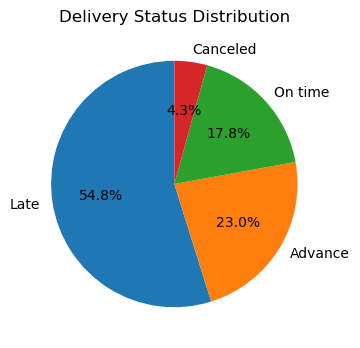

In [175]:
# 1. Sample report & metrics provided as reference. However, you can come up with your own charts/visualizations as required. You can come up with the codes to replicate the charts/visualizations.
# 2. The data used for the sample reports is different than the data provided for this case study so the numbers may not be same

# 1) order delivery

delivery_status_count
mpl.figure(figsize = (4,4))
mpl.pie(delivery_status_count,labels = delivery_status_count.index,autopct = '%1.1f%%', startangle = 90)
mpl.title('Delivery Status Distribution')
mpl.show()

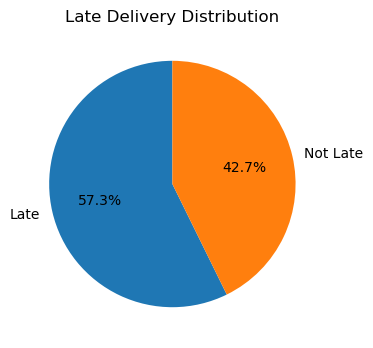

In [161]:
# 2)  Late Delivery Distribution

late_delivery = final_data.groupby("late_delivery_risk")["order_item_id"].count()
mpl.figure(figsize = (4,4))
mpl.pie(late_delivery,labels = late_delivery.index,autopct = '%1.1f%%', startangle = 90)
mpl.title('Late Delivery Distribution')
mpl.show()

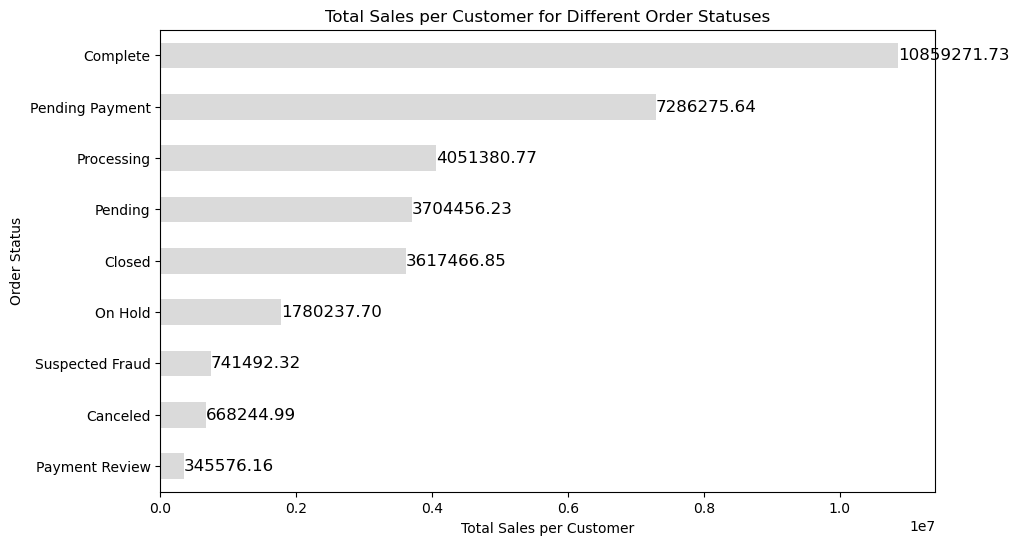

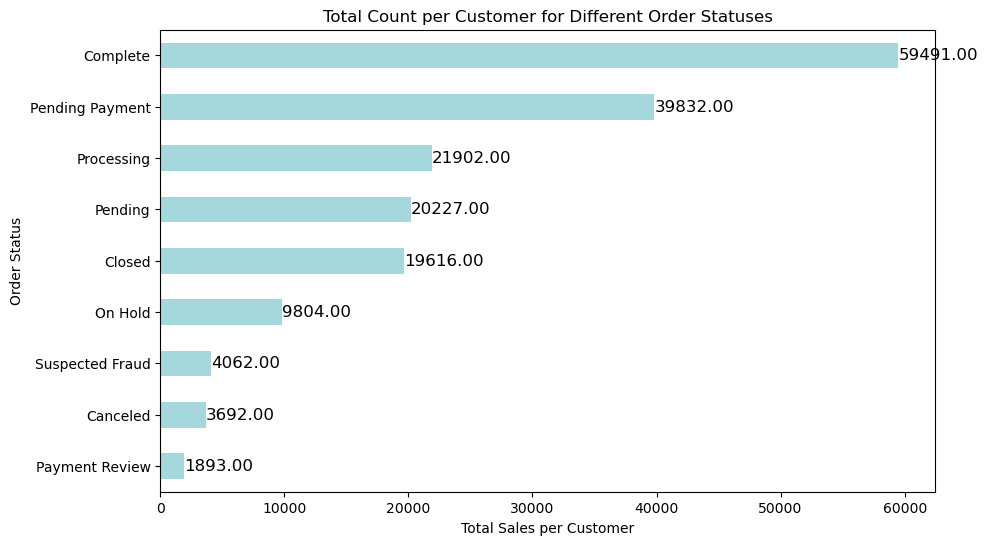

In [178]:
# 3) order_status by sales and count

order_status = final_data.groupby("order_status")["sales_per_customer"].sum().round(2)
order_status_qty = final_data.groupby("order_status")["sales_per_customer"].count().round(2)

mpl.figure(figsize = (10, 6))
ax = order_status.sort_values().plot(kind = 'barh',color = "#DADADA")
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge', fontsize = 12, color = 'black')

mpl.title('Total Sales per Customer for Different Order Statuses')
mpl.xlabel('Total Sales per Customer')
mpl.ylabel('Order Status')
mpl.show()

mpl.figure(figsize = (10, 6))
ax = order_status_qty.sort_values().plot(kind = 'barh',color = "#A5D8DD")
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge', fontsize = 12, color = 'black')

mpl.title('Total Count per Customer for Different Order Statuses')
mpl.xlabel('Total Sales per Customer')
mpl.ylabel('Order Status')
mpl.show()

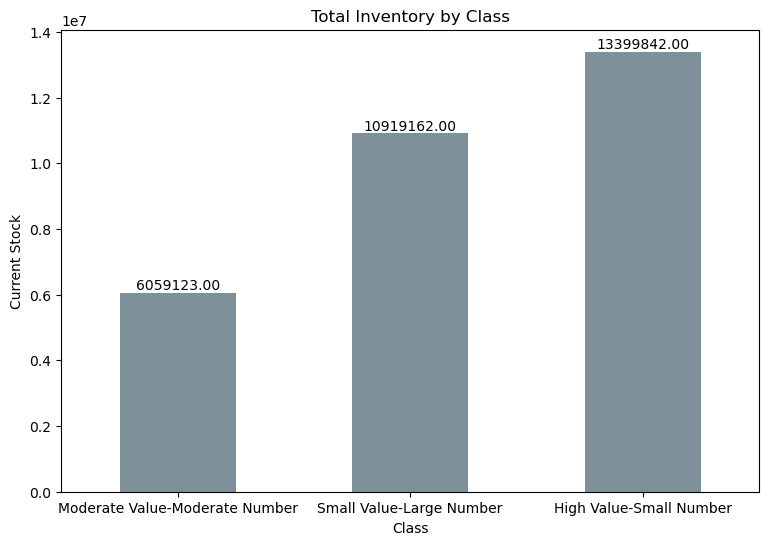

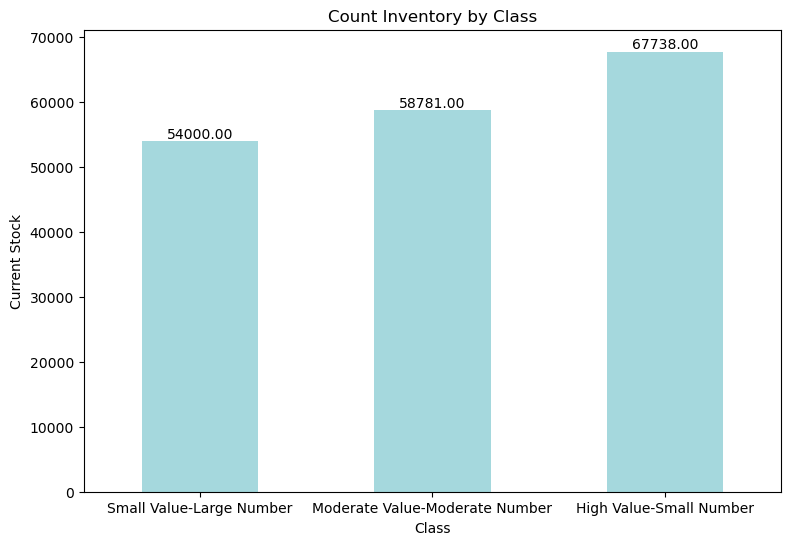

In [180]:
# 4) inventory by class (total and count)

inventory_tot = final_data.groupby("class")['current_stock'].sum()
inventory_count = final_data.groupby("class")['current_stock'].count()

mpl.figure(figsize=(9,6))
ax = inventory_tot.sort_values().plot(kind = 'bar',color = "#7E909A")
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge', fontsize = 10, color = 'black')

mpl.title('Total Inventory by Class')
mpl.xlabel('Class')
mpl.ylabel('Current Stock')
mpl.xticks(rotation = 0, ha = 'center')
mpl.show()

mpl.figure(figsize = (9, 6))
ax = inventory_count.sort_values().plot(kind = 'bar',color = "#A5D8DD")
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge', fontsize = 10, color = 'black')

mpl.title('Count Inventory by Class')
mpl.xlabel('Class')
mpl.ylabel('Current Stock')
mpl.xticks(rotation = 0, ha = 'center')
mpl.show()

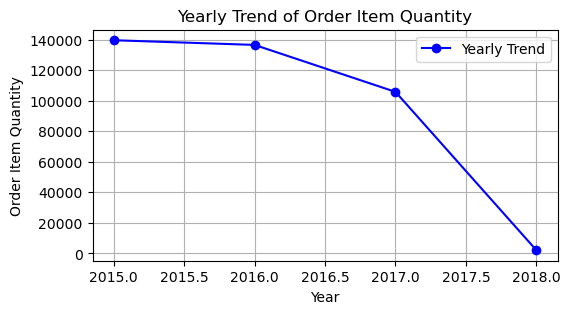

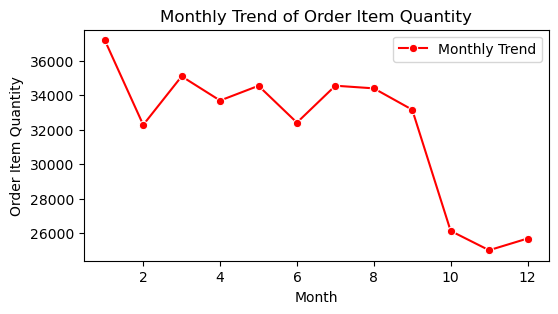

In [183]:
# 5) visualization of order item quantity by year and month

grouped_by_year = final_data.groupby("order_year")["order_item_quantity"].sum().reset_index()
grouped_by_year
grouped_by_month = final_data.groupby("order_month")["order_item_quantity"].sum().reset_index()
grouped_by_month

# Plot the trend by year
mpl.figure(figsize = (6, 3))
mpl.plot(grouped_by_year['order_year'], grouped_by_year['order_item_quantity'], marker = 'o', label = 'Yearly Trend', color = 'blue')
mpl.title('Yearly Trend of Order Item Quantity')
mpl.xlabel('Year')
mpl.ylabel('Order Item Quantity')
mpl.legend()
mpl.grid(True)
mpl.show()

# Plot the trend by month
mpl.figure(figsize = (6, 3))
sns.lineplot(x = 'order_month', y = 'order_item_quantity', data = grouped_by_month, marker = 'o', label = 'Monthly Trend', color = 'red')
mpl.title('Monthly Trend of Order Item Quantity')
mpl.xlabel('Month')
mpl.ylabel('Order Item Quantity')
mpl.legend()
mpl.show()



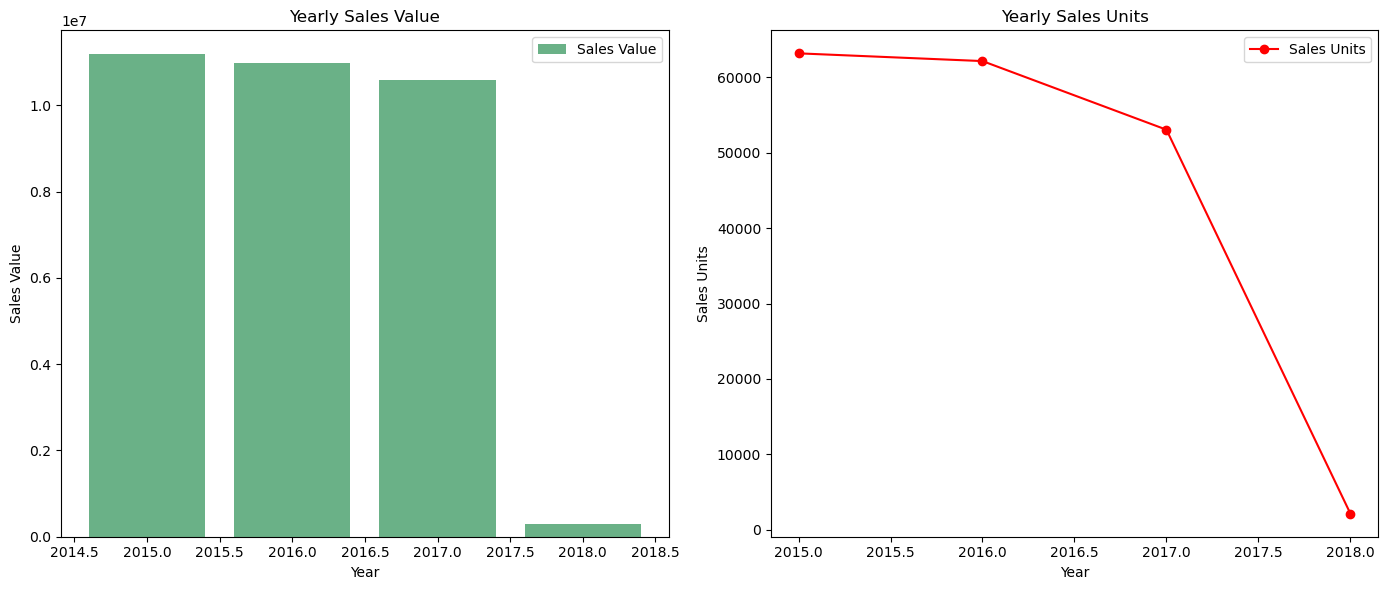

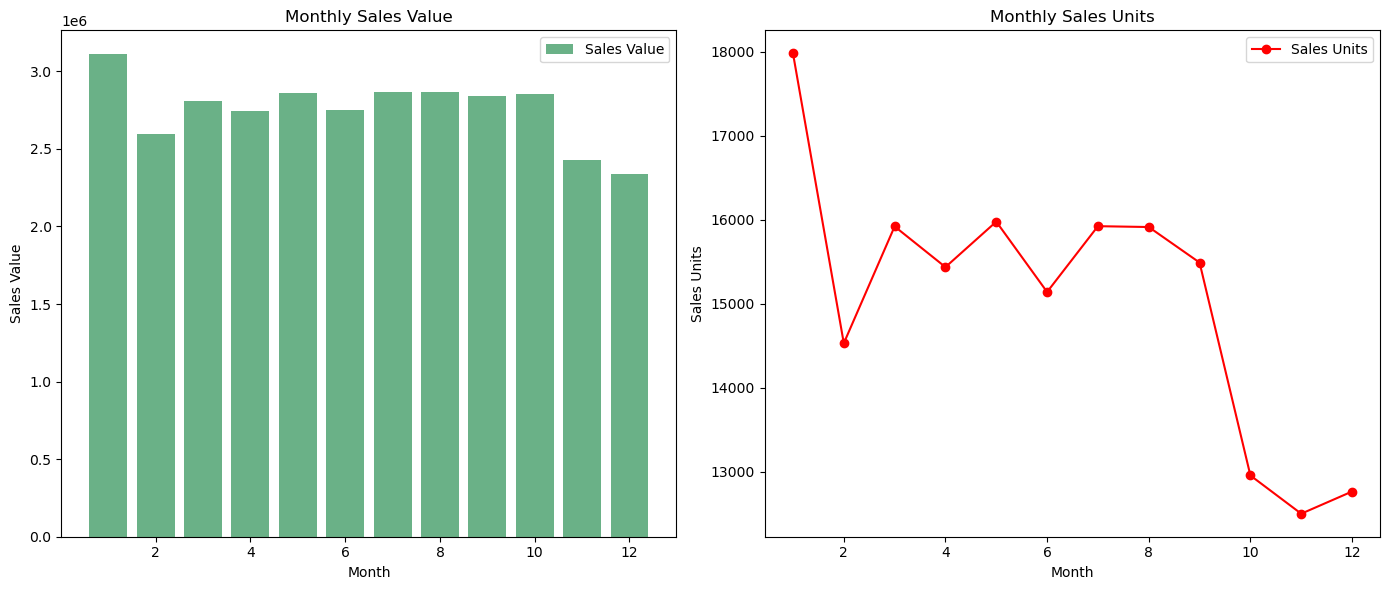

In [186]:
# 6) sales trend by values/units

grouped_by_year = final_data.groupby("order_year").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
grouped_by_year
grouped_by_month = final_data.groupby("order_month").agg(sales_value = ("sales_per_customer","sum"),sales_units = ("sales_per_customer","count")).round(2).reset_index()
grouped_by_month

# Plot the trend by year
mpl.figure(figsize = (14, 6))

# Subplot for Yearly Sales Value
mpl.subplot(1, 2, 1)
mpl.bar(grouped_by_year['order_year'], grouped_by_year['sales_value'], color = '#6AB187', label = 'Sales Value')
mpl.title('Yearly Sales Value')
mpl.xlabel('Year')
mpl.ylabel('Sales Value')
mpl.legend()

# Subplot for Yearly Sales Units
mpl.subplot(1, 2, 2)
mpl.plot(grouped_by_year['order_year'], grouped_by_year['sales_units'], marker = 'o', color = 'red', label = 'Sales Units')
mpl.title('Yearly Sales Units')
mpl.xlabel('Year')
mpl.ylabel('Sales Units')
mpl.legend()

mpl.tight_layout()
mpl.show()

# Plot the trend by month
mpl.figure(figsize = (14, 6))

# Subplot for Monthly Sales Value
mpl.subplot(1, 2, 1)
mpl.bar(grouped_by_month['order_month'], grouped_by_month['sales_value'], color = '#6AB187', label = 'Sales Value')
mpl.title('Monthly Sales Value')
mpl.xlabel('Month')
mpl.ylabel('Sales Value')
mpl.legend()

# Subplot for Monthly Sales Units
mpl.subplot(1, 2, 2)
mpl.plot(grouped_by_month['order_month'], grouped_by_month['sales_units'], marker = 'o', color = 'red', label = 'Sales Units')
mpl.title('Monthly Sales Units')
mpl.xlabel('Month')
mpl.ylabel('Sales Units')
mpl.legend()

mpl.tight_layout()
mpl.show()

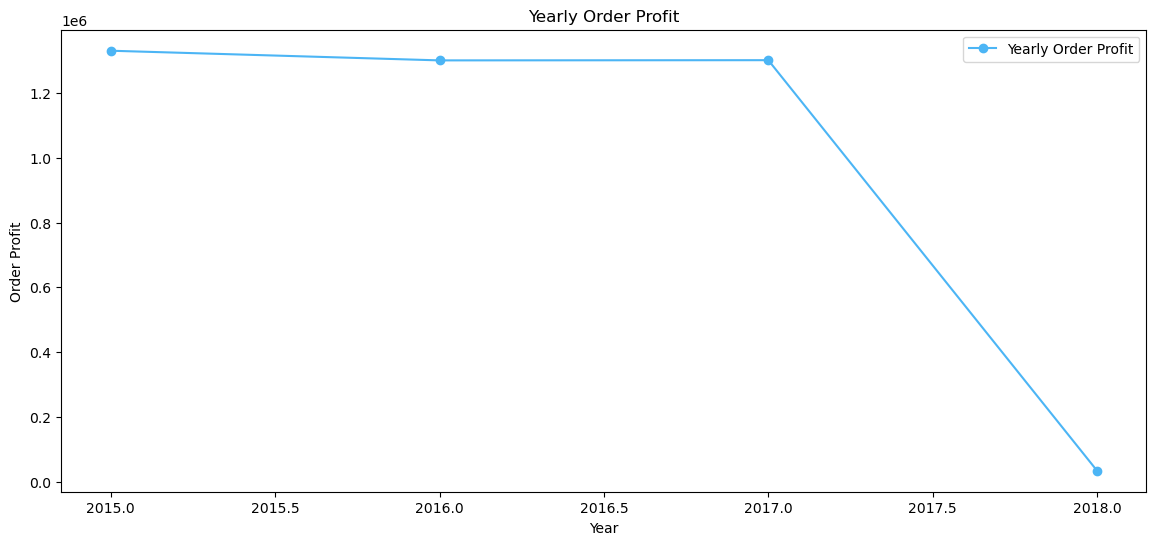

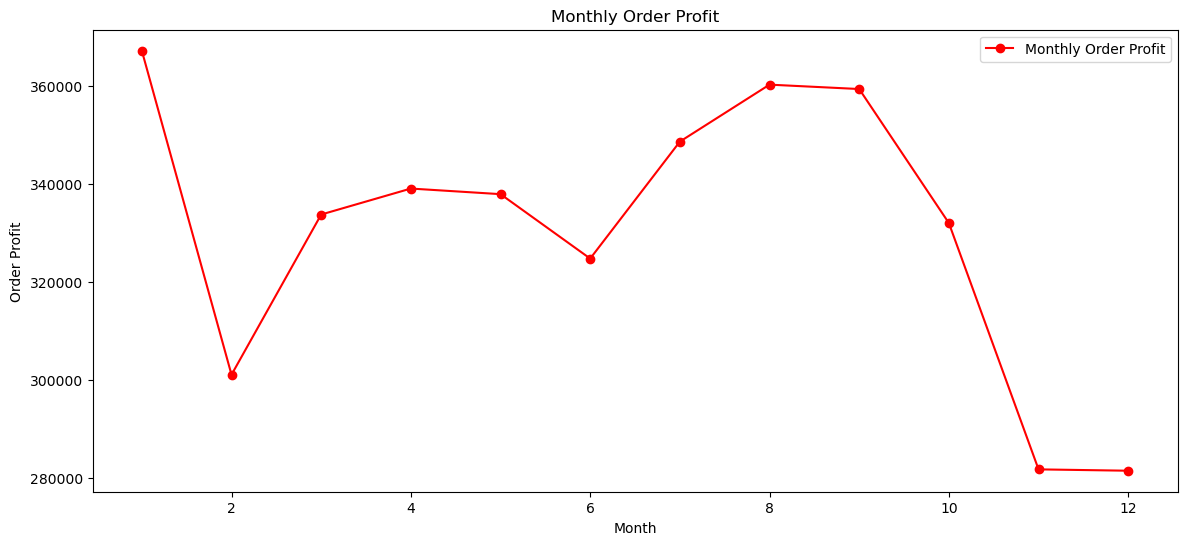

In [187]:
# 7) profit trend by values

grouped_by_year = final_data.groupby("order_year")["order_profit_per_order"].sum().round(2).reset_index()
grouped_by_year
grouped_by_month = final_data.groupby("order_month")["order_profit_per_order"].sum().round(2).reset_index()
grouped_by_month

# Plot the trend by year
mpl.figure(figsize = (14, 6))

# Lineplot for Yearly Order Profit
mpl.plot(grouped_by_year['order_year'], grouped_by_year['order_profit_per_order'], marker = 'o', label = 'Yearly Order Profit',color = "#4CB5F5")

mpl.title('Yearly Order Profit')
mpl.xlabel('Year')
mpl.ylabel('Order Profit')
mpl.legend()

mpl.show()

# Plot the trend by month
mpl.figure(figsize = (14, 6))

# Lineplot for Monthly Order Profit
mpl.plot(grouped_by_month['order_month'], grouped_by_month['order_profit_per_order'], marker = 'o', label = 'Monthly Order Profit',color = "red")

mpl.title('Monthly Order Profit')
mpl.xlabel('Month')
mpl.ylabel('Order Profit')
mpl.legend()

mpl.show()

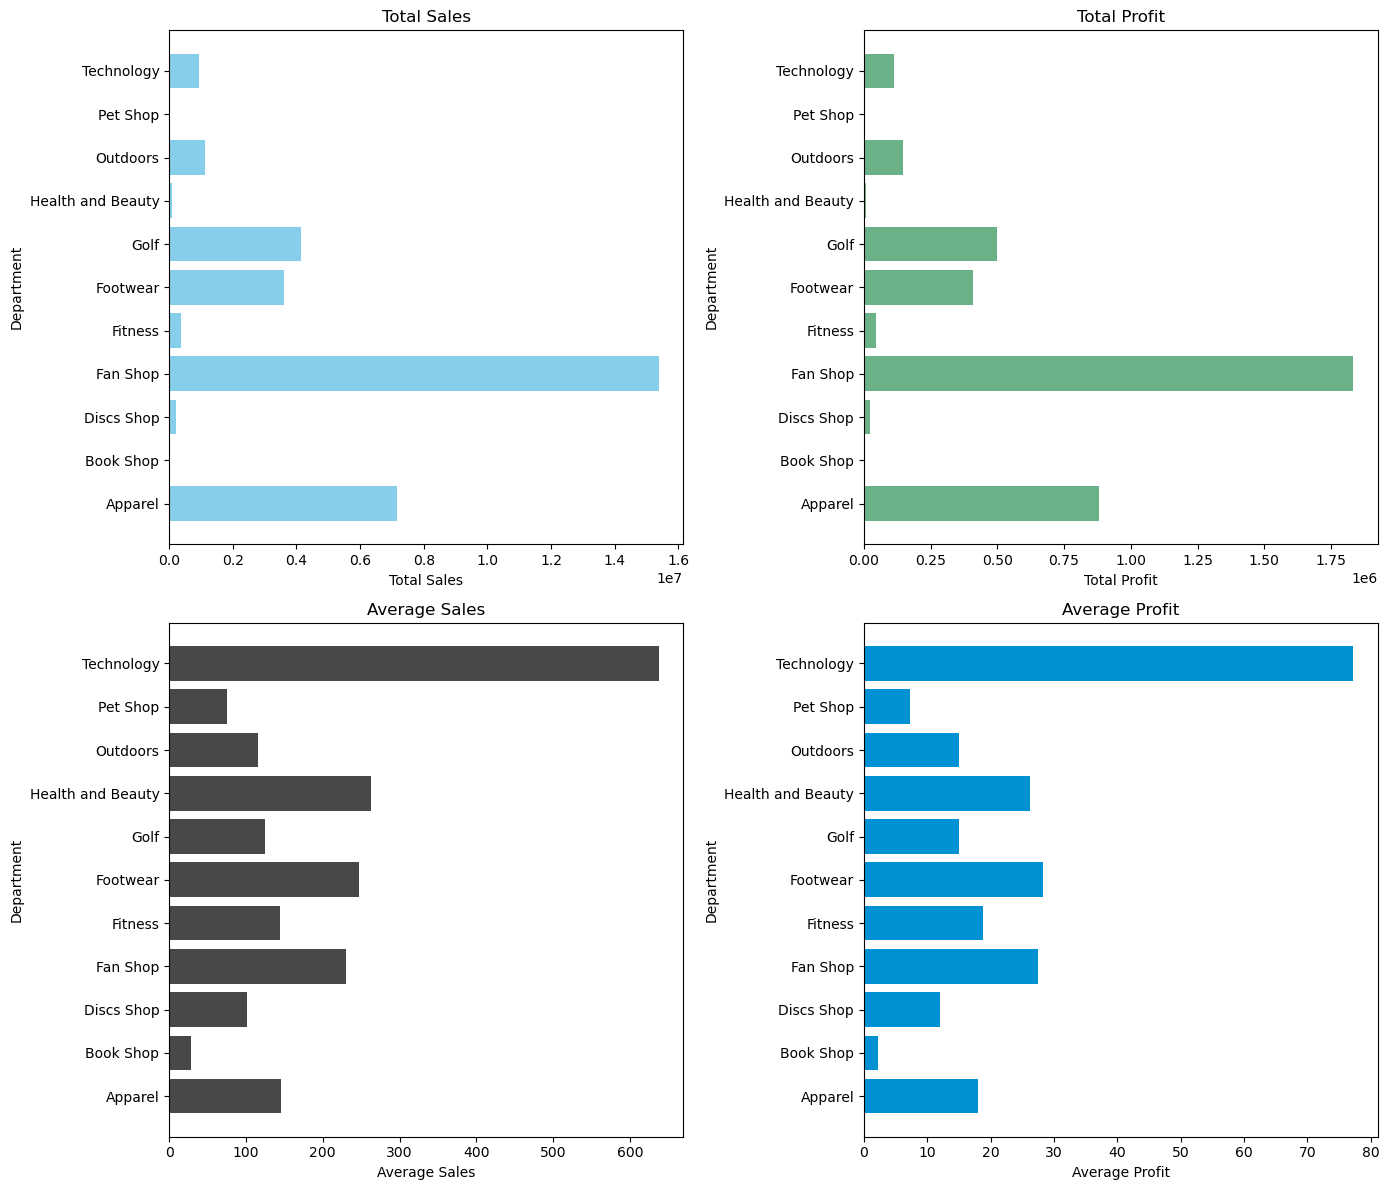

In [188]:
# 8)  Deparment Wise

mpl.figure(figsize = (14, 12))

# Create horizontal bar plots for each metric
mpl.subplot(2, 2, 1)
mpl.barh(department_wise['department_name'], department_wise['tot_sales'], color = 'skyblue')
mpl.title('Total Sales')
mpl.xlabel('Total Sales')
mpl.ylabel('Department')

mpl.subplot(2, 2, 2)
mpl.barh(department_wise['department_name'], department_wise['tot_profit'], color = '#6AB187')
mpl.title('Total Profit')
mpl.xlabel('Total Profit')
mpl.ylabel('Department')

mpl.subplot(2, 2, 3)
mpl.barh(department_wise['department_name'], department_wise['avg_sales'], color = '#484848')
mpl.title('Average Sales')
mpl.xlabel('Average Sales')
mpl.ylabel('Department')

mpl.subplot(2, 2, 4)
mpl.barh(department_wise['department_name'], department_wise['avg_profit'], color = '#0091D5')
mpl.title('Average Profit')
mpl.xlabel('Average Profit')
mpl.ylabel('Department')

# Adjust layout for better spacing
mpl.tight_layout()

# Show the plots
mpl.show()

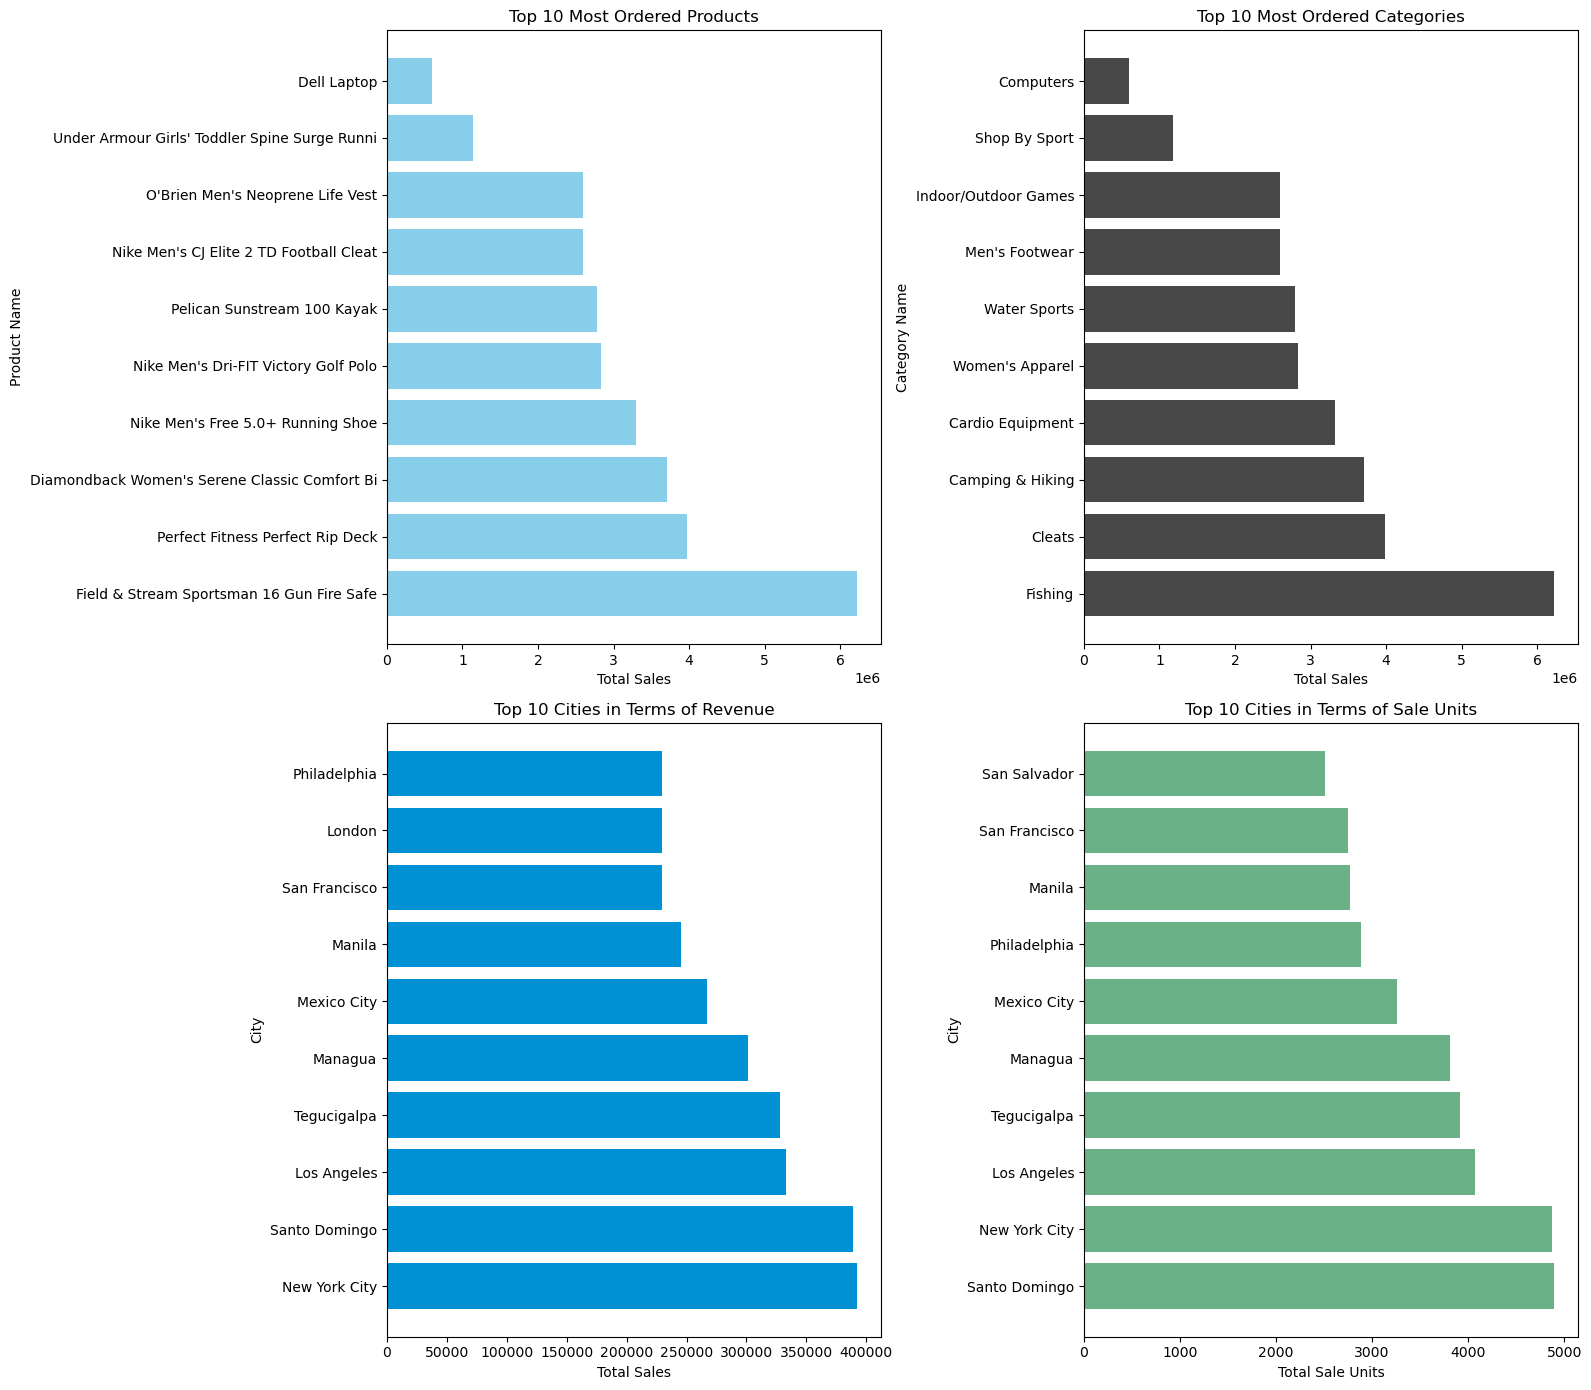

In [189]:
# 9) Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

mpl.figure(figsize = (16, 14))

# Subplot for Top 10 Most Ordered Products
mpl.subplot(2, 2, 1)
mpl.barh(top10_ordered_product['product_name'], top10_ordered_product['total_sales'], color = 'skyblue')
mpl.title('Top 10 Most Ordered Products')
mpl.xlabel('Total Sales')
mpl.ylabel('Product Name')

# Subplot for Top 10 Most Ordered Categories
mpl.subplot(2, 2, 2)
mpl.barh(top10_ordered_Categories['category_name'], top10_ordered_Categories['total_sales'], color = '#484848')
mpl.title('Top 10 Most Ordered Categories')
mpl.xlabel('Total Sales')
mpl.ylabel('Category Name')

# Subplot for Top 10 Cities in Terms of Revenue
mpl.subplot(2, 2, 3)
mpl.barh(top10_ordered_cities['order_city'], top10_ordered_cities['total_sales'], color = '#0091D5')
mpl.title('Top 10 Cities in Terms of Revenue')
mpl.xlabel('Total Sales')
mpl.ylabel('City')

# Subplot for Top 10 Cities in Terms of Sale Units
mpl.subplot(2, 2, 4)
mpl.barh(top10_ordered_cities_qty['order_city'], top10_ordered_cities_qty['order_item_quantity'], color = '#6AB187')
mpl.title('Top 10 Cities in Terms of Sale Units')
mpl.xlabel('Total Sale Units')
mpl.ylabel('City')

# Adjust layout for better spacing
mpl.tight_layout()

# Show the plots
mpl.show()

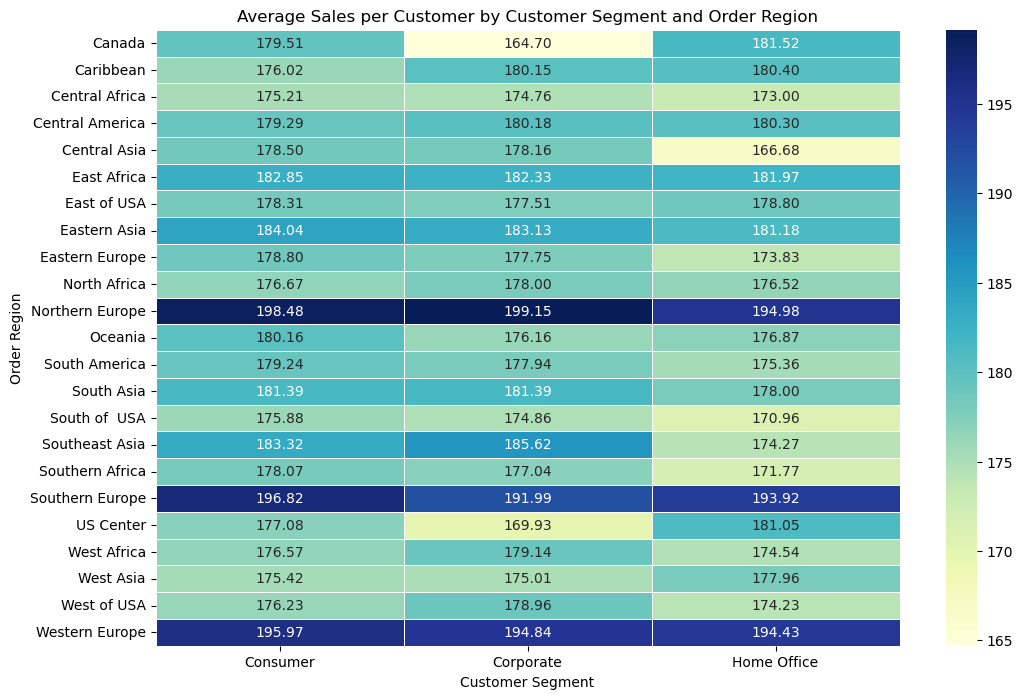

In [171]:
# 3. Any other visualizaitons (at least 2) you can create beyond visualizaitons mentioned in the sample reports & metrics?


#customer segment by region
customer_seg_by_region = final_data.groupby(["order_region","customer_segment"])["sales_per_customer"].mean().round(2).unstack()
customer_seg_by_region

mpl.figure(figsize = (12, 8))

# Create a heatmap for Customer Segmentation by Order Region
sns.heatmap(customer_seg_by_region, annot = True, cmap = "YlGnBu", fmt = ".2f", linewidths = .5)

# Set labels and title
mpl.xlabel('Customer Segment')
mpl.ylabel('Order Region')
mpl.title('Average Sales per Customer by Customer Segment and Order Region')

# Show the plot
mpl.show()

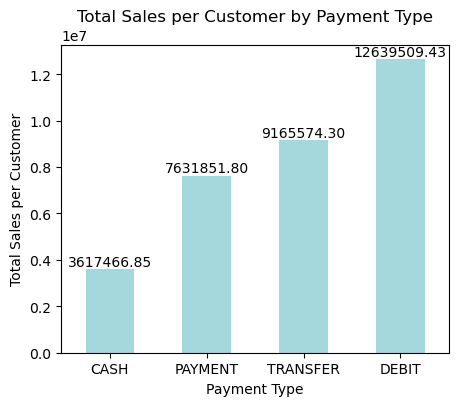

In [192]:
# payment type visualization
payment = final_data.groupby("type")["sales_per_customer"].sum().round(2)

mpl.figure(figsize = (5, 4))

# Create a bar plot for Total Sales per Customer by Payment Type
ax = payment.sort_values().plot(kind = 'bar',color = "#A5D8DD")
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'edge', fontsize = 10, color = 'black')
mpl.xlabel('Payment Type')
mpl.ylabel('Total Sales per Customer')
mpl.title('Total Sales per Customer by Payment Type')
mpl.xticks(rotation = 0, ha = 'center')

# Show the plot
mpl.show()

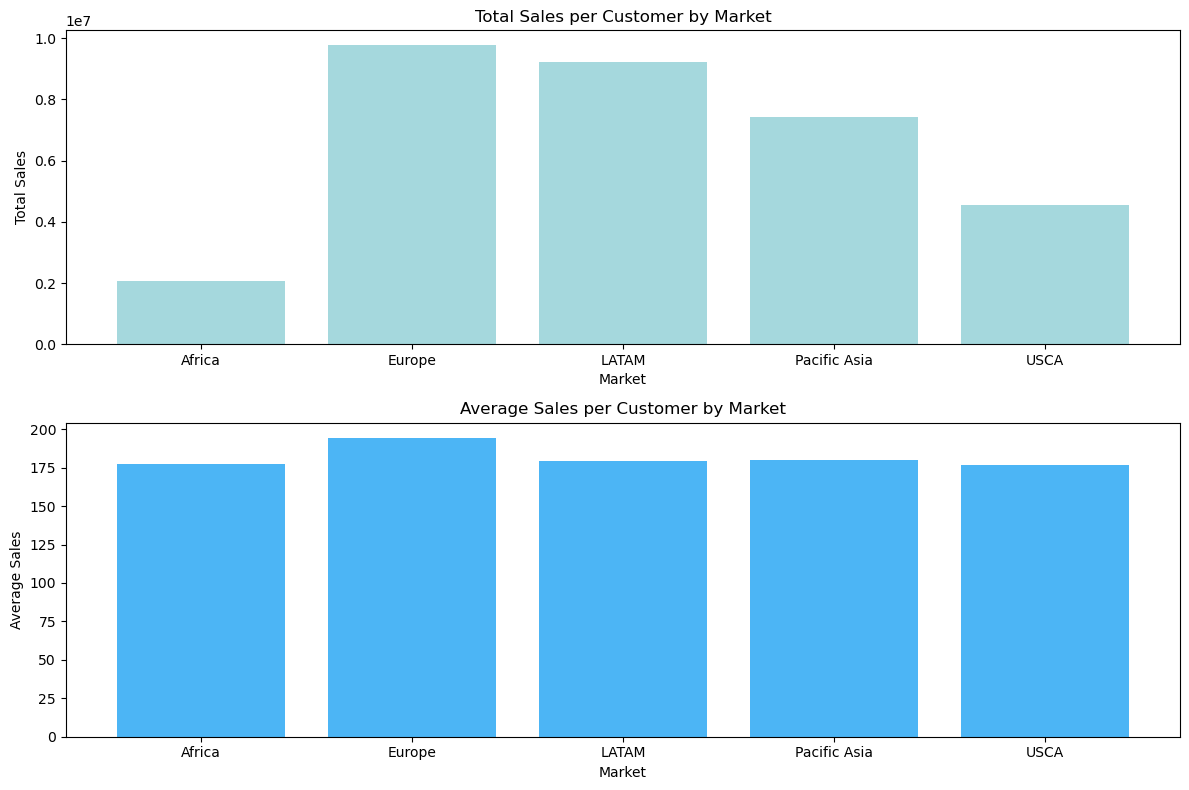

In [194]:
# Market wise visualization

market_wise = final_data.groupby("market").agg(total_sales = ("sales_per_customer","sum"),avg_sales = ("sales_per_customer","mean")).round(2).reset_index()
market_wise

mpl.figure(figsize = (12, 8))

# Create a bar chart for Total Sales by Market
mpl.subplot(2, 1, 1)
mpl.bar(market_wise['market'], market_wise['total_sales'], color = '#A5D8DD')
mpl.xlabel('Market')
mpl.ylabel('Total Sales')
mpl.title('Total Sales per Customer by Market')

# Create a bar chart for Average Sales by Market
mpl.subplot(2, 1, 2)
mpl.bar(market_wise['market'], market_wise['avg_sales'], color = '#4CB5F5')
mpl.xlabel('Market')
mpl.ylabel('Average Sales')
mpl.title('Average Sales per Customer by Market')

# Adjust layout for better readability
mpl.tight_layout()

# Show the plots
mpl.show()

In [195]:
# e. Predictive modeling & perform the tasks as per your understanding (Weightage: 20%)

In [196]:
# 1. Build predictive model to predict the sales (Hint: You are required to aggregate the data at customer level. It means that one record for one customer)

# 2. Prepare end to end code with proper comments


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

aggregated_data = final_data.groupby('customer_id').agg(
    avg_order_qty = ('order_item_quantity', 'mean'),
    benefit_per_order = ('benefit_per_order', 'mean'),
    total_sales = ('sales_per_customer', 'sum')
).reset_index()

# Split the data into features (X) and target (y)
X = aggregated_data[['avg_order_qty', 'benefit_per_order']]
y = aggregated_data['total_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Predict sales for new data
new_customer_data = pd.DataFrame({'avg_order_qty': [2], 'benefit_per_order': [26]})
new_customer_scaled = scaler.transform(new_customer_data)
predicted_sales = model.predict(new_customer_scaled)

print('Predicted Sales for New Customer:', predicted_sales[0])

Mean Squared Error: 1418332.94
R-squared: 0.38
Predicted Sales for New Customer: 2000.4236281340995


In [197]:
# 3. Derive insights as per the models

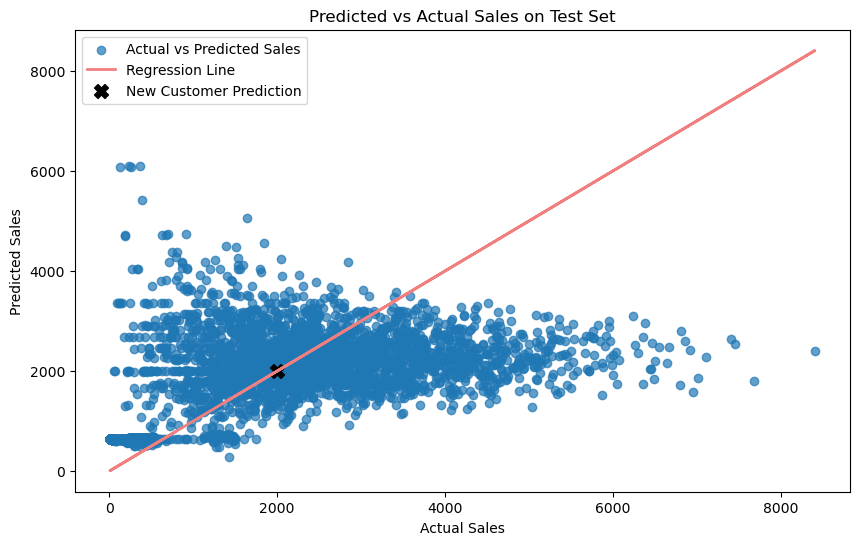

In [198]:
mpl.figure(figsize = (10, 6))
mpl.scatter(y_test, y_pred, alpha = 0.7, label = 'Actual vs Predicted Sales')
mpl.title('Predicted vs Actual Sales on Test Set')
mpl.xlabel('Actual Sales')
mpl.ylabel('Predicted Sales')

# Add a regression line
mpl.plot(y_test, y_test, color = 'lightcoral', linewidth = 2, label = 'Regression Line')

# Mark the predicted sales for the new customer
mpl.scatter(predicted_sales, predicted_sales, color = 'black', marker = 'X', s = 100, label = 'New Customer Prediction')

mpl.legend()
mpl.show()